In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sb
import mpld3 # interactive plots

In [2]:
random_seed = 42

## Utility function to drop duplicate columns

In [3]:
from pandas.core.common import array_equivalent

def remove_duplicate_cols(df):
    """http://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
    
    Use like:
    df = remove_duplicate_cols(df)
    
    If no duplicates, we return gracefully
    """
    Cols = list(df.columns)
    for i,item in enumerate(df.columns):
        if item in df.columns[:i]: Cols[i] = "toDROP"
    df.columns = Cols
    drop_cols = len([col for col in list(df.columns) if col == 'toDROP'])
    if drop_cols:
        return df.drop("toDROP", axis=1)
    else:
        return df

In [4]:
ls data/turn_data

dal_turns_dev.csv     is13_turns_train.csv  neo_turns_test.csv
dal_turns_test.csv    liwc_turns_dev.csv    neo_turns_train.csv
dal_turns_train.csv   liwc_turns_test.csv   turns_dev.csv
is13_turns_dev.csv    liwc_turns_train.csv  turns_test.csv
is13_turns_test.csv   neo_turns_dev.csv     turns_train.csv


## Read in and Format the data

In [9]:
dal = {'train':pd.read_csv('data/turn_data/dal_turns_train.csv'),
       'dev':pd.read_csv('data/turn_data/dal_turns_dev.csv'),
       'test':pd.read_csv('data/turn_data/dal_turns_test.csv')}
dal['train'].head(1)

turn                  name  FunctionalWordPercent  mean_pleaseant  \
0     0  p204p205-part1_ch1_1               0.520152        0.308089   

   max_pleaseant  min_pleaseant  median_pleaseant  std_pleaseant  \
0       0.183774        0.48641          0.258734       0.551203   

   var_pleaseant  mean_activate ...   std_activate  var_activate  \
0       0.422819       0.381126 ...       0.709322      0.681551   

   mean_imagery  max_imagery  min_imagery  median_imagery  std_imagery  \
0      0.973491      0.86647     0.136192        1.105293     1.114331   

   var_imagery  label  pid  
0     1.313934      0  205  

[1 rows x 23 columns]

In [10]:
is13 = {'train':pd.read_csv('data/turn_data/is13_turns_train.csv'),
       'dev':pd.read_csv('data/turn_data/is13_turns_dev.csv'),
       'test':pd.read_csv('data/turn_data/is13_turns_test.csv')}

In [11]:
liwc = {'train':pd.read_csv('data/turn_data/liwc_turns_train.csv'),
       'dev':pd.read_csv('data/turn_data/liwc_turns_dev.csv'),
       'test':pd.read_csv('data/turn_data/liwc_turns_test.csv')}

In [12]:
neo = {'train':pd.read_csv('data/turn_data/neo_turns_train.csv'),
       'dev':pd.read_csv('data/turn_data/neo_turns_dev.csv'),
       'test':pd.read_csv('data/turn_data/neo_turns_test.csv')}

In [13]:
turn = {'train':pd.read_csv('data/turn_data/turns_train.csv'),
       'dev':pd.read_csv('data/turn_data/turns_dev.csv'),
       'test':pd.read_csv('data/turn_data/turns_test.csv')}

In [14]:
turn['train'].shape, dal['train'].shape, liwc['train'].shape, neo['train'].shape

((4216, 7), (4216, 23), (4216, 134), (4216, 9))

In [111]:
# combine all the data
all_train = pd.concat([turn['train'], neo['train'], liwc['train'], dal['train'], is13['train']], axis=1)
all_dev = pd.concat([turn['dev'], neo['dev'], liwc['dev'], dal['dev'], is13['dev']], axis=1)
all_test = pd.concat([turn['test'], neo['test'], liwc['test'], dal['test'], is13['test']], axis=1)

# all_train = pd.concat([turn['train'], neo['train'], liwc['train'], dal['train']], axis=1)
# all_dev = pd.concat([turn['dev'], neo['dev'], liwc['dev'], dal['dev']], axis=1)
# all_test = pd.concat([turn['test'], neo['test'], liwc['test'], dal['test']], axis=1)

# drop columns duplicated across feature sets
all_train = remove_duplicate_cols(all_train)
all_dev = remove_duplicate_cols(all_dev)
all_test = remove_duplicate_cols(all_test)

# index by person by ipu
all_train = all_train.set_index(['pid', 'turn'])
all_dev = all_dev.set_index(['pid', 'turn'])
all_test = all_test.set_index(['pid', 'turn'])

# drop columns that aren't covariates or labels
useless_cols = ['Unnamed: 0', 'fname', 'name', 'start', 'end']
all_train = all_train.drop(useless_cols, axis=1)
all_dev = all_dev.drop(useless_cols, axis=1)
all_test = all_test.drop(useless_cols, axis=1)

all_data = pd.concat

## Resample the training and test splits

In [116]:
all_data = pd.concat([all_train, all_dev, all_test], axis=0)

In [148]:
np.random.seed()
pids = all_data.index.get_level_values(0).unique()
print len(pids)
train_pids = np.random.choice(pids, 100, replace=False)
test_pids = [p for p in pids if p not in train_pids]

162


In [149]:
all_train = all_data[all_data.index.get_level_values('pid').isin(train_pids)]
all_test = all_data[all_data.index.get_level_values('pid').isin(test_pids)]

In [150]:
all_train.shape, all_dev.shape, all_test.shape

((6995, 6531), (3030, 6531), (4678, 6531))

In [151]:
# combine the training and dev datasets
# all_train = pd.concat([all_train, all_dev])

In [199]:
# fill in the random NaNs with 0, since working with standardized columns
all_train = all_train.fillna(0.0)
all_dev = all_dev.fillna(0.0)
all_test = all_test.fillna(0.0)
all_data = all_data.fillna(0.0)

In [153]:
all_train.isnull().any().any()

False

In [154]:
all_test.isnull().any().any()

False

In [131]:
# ### WRITE OUT FINAL CSVS ###
# all_train.to_csv('data/final_turns_train.csv')
# all_test.to_csv('data/final_turns_test.csv')

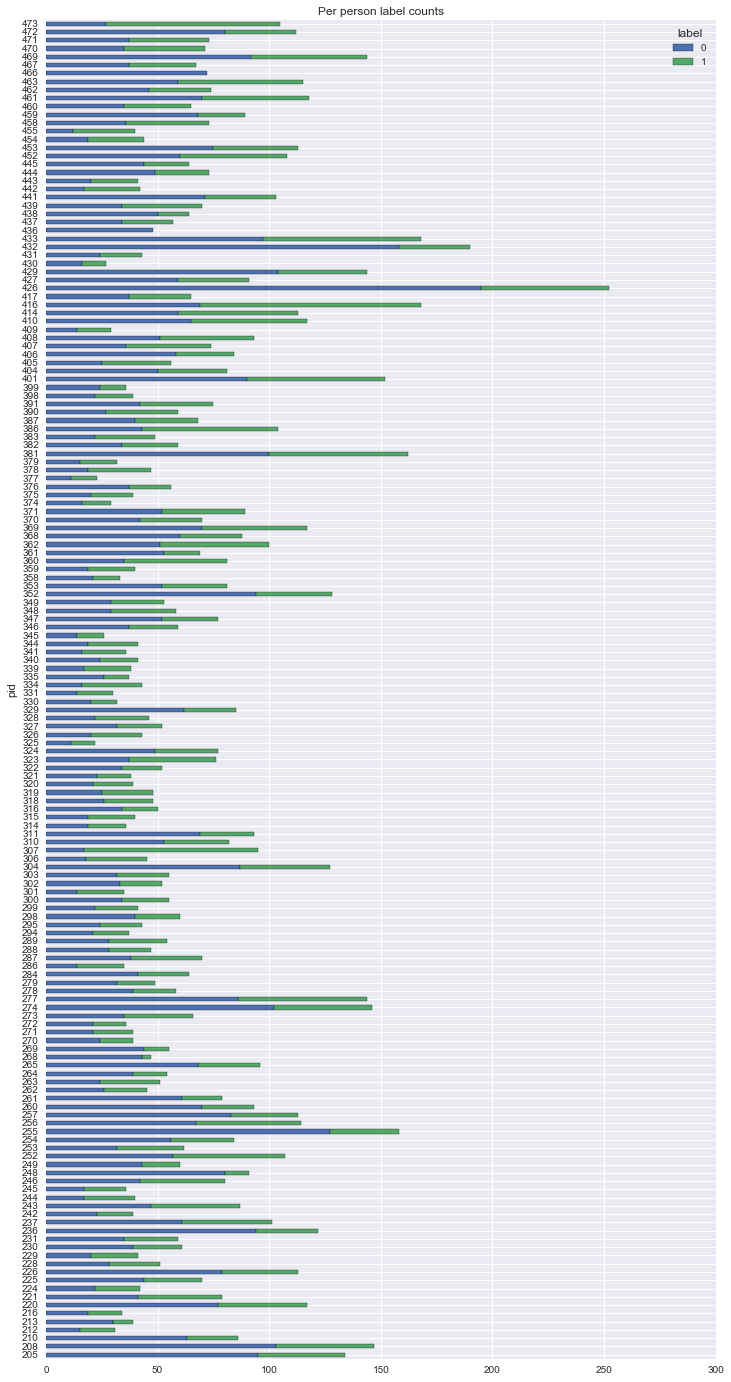

In [226]:
all_data.groupby(level=0)['label'].value_counts().unstack().plot.barh(stacked=True, figsize=(12,24))
plt.title('Per person label counts')
plt.savefig('turns_person_label_bars.pdf')

In [236]:
# drop the ones with no labels: 436 and 466
print all_data.shape
all_data = all_data[~all_data.index.get_level_values(0).isin([436,466])]
print all_data.shape

(11673, 6531)
(11553, 6531)


In [237]:
# hold one person out cross validation over all data
scores = {}
bases = {}
pids = all_data.index.get_level_values(0).unique()
for i, pid in enumerate(pids):
    print i, pid,
    rf = RF(n_estimators=200, max_features=10, criterion='entropy', random_state=random_seed, n_jobs=-1)
    train_x = all_data[all_data.index.get_level_values(0) != pid].drop(noncovariates, axis=1).as_matrix()
    train_y = all_data[all_data.index.get_level_values(0) != pid]['label'].as_matrix()
    test_x = all_data[all_data.index.get_level_values(0) == pid].drop(noncovariates, axis=1).as_matrix()
    test_y = all_data[all_data.index.get_level_values(0) == pid]['label'].as_matrix() 
    if len(list(set(np.unique(test_y)))) != 2:
        print "BAD PID"
        score = 0.0
        base = 0.0
    else:
        t,f = all_data[all_data.index.get_level_values(0) == pid]['label'].value_counts()
        base = max([t,f])/float(sum([t,f]))
        rf.fit(train_x, train_y)
        preds = rf.predict(test_x)
        score = accuracy_score(test_y, preds)
    print "Acc: %2.4f, Base: %2.4f" % (score, base)
    scores[pid] = score
    bases[pid] = base
print "DONE"

0 205 Acc: 0.7015, Base: 0.7090
1 210 Acc: 0.6860, Base: 0.7326
2 213 Acc: 0.7949, Base: 0.7692
3 212 Acc: 0.5484, Base: 0.5161
4 225 Acc: 0.6286, Base: 0.6286
5 216 Acc: 0.5882, Base: 0.5588
6 221 Acc: 0.5190, Base: 0.5190
7 220 Acc: 0.6752, Base: 0.6581
8 236 Acc: 0.7787, Base: 0.7705
9 224 Acc: 0.5714, Base: 0.5238
10 229 Acc: 0.4878, Base: 0.5122
11 226 Acc: 0.6195, Base: 0.6991
12 228 Acc: 0.5686, Base: 0.5490
13 231 Acc: 0.5932, Base: 0.5932
14 230 Acc: 0.6066, Base: 0.6393
15 237 Acc: 0.6139, Base: 0.6040
16 243 Acc: 0.5172, Base: 0.5402
17 242 Acc: 0.6154, Base: 0.5897
18 245 Acc: 0.4444, Base: 0.5278
19 244 Acc: 0.4250, Base: 0.5750
20 248 Acc: 0.8132, Base: 0.8791
21 246 Acc: 0.5500, Base: 0.5250
22 249 Acc: 0.6833, Base: 0.7167
23 257 Acc: 0.7611, Base: 0.7345
24 253 Acc: 0.5000, Base: 0.5161
25 252 Acc: 0.5327, Base: 0.5327
26 255 Acc: 0.7848, Base: 0.8038
27 254 Acc: 0.6786, Base: 0.6667
28 279 Acc: 0.6735, Base: 0.6531
29 256 Acc: 0.5965, Base: 0.5877
30 261 Acc: 0.7342, 

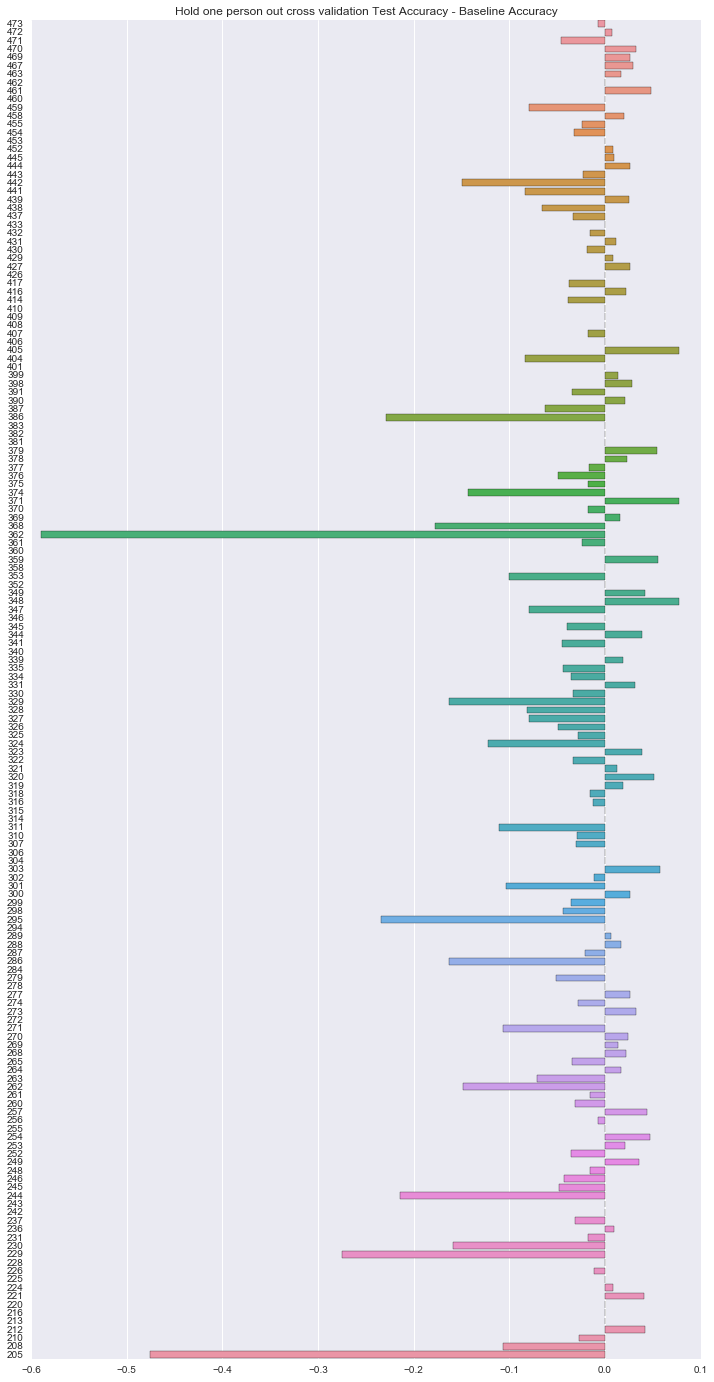

In [273]:
fig, ax = plt.subplots(1,1, figsize=(12,24))

ys = [50*y for y in range(len(bases.keys()))]
accs = [a-b for a,b in zip(scores.values(), bases.values())]
# ax.scatter(bases.values(), ys, color='b', label='Baseline')
# ax.scatter(scores.values(), ys, color='r', label='Accuracy')
sb.barplot(list(reversed(accs)), list(reversed(ys)), ax=ax, orient='h')
# ax.set_yticks(ys)
ax.set_yticklabels(list(reversed(bases.keys())))
plt.title('Hold one person out cross validation Test Accuracy - Baseline Accuracy')
# ax.legend()
# ax.set_ylim(-1,max(ys)+1)
plt.savefig('per_person_accuracies_wo_bad_pids.pdf')
print

In [238]:
# what pids are new here 
old_turns_train = pd.read_csv('data/all_train_normed.csv')
old_turns_test = pd.read_csv('data/all_test_normed.csv')
old_turns = pd.concat([old_turns_train, old_turns_test], axis=0)
old_pids = old_turns['person'].unique()
new_pids = sorted(list(set(pids) - set(old_pids)))
print new_pids

[205, 208, 210, 212, 213, 216, 224, 225, 236, 237, 242, 243, 246, 248, 249, 256, 257, 273, 278, 279, 284, 286, 287, 294, 295, 304, 310, 311, 316, 318, 319, 320, 321, 324, 325, 326, 327, 328, 329, 339, 341, 348, 349, 358, 359, 370, 371, 374, 375, 376, 377, 381, 390, 391, 401, 404, 405, 416, 417, 426, 427, 430, 431, 432, 433, 437, 438, 439, 441, 444, 445, 454, 455, 458, 459, 462, 463, 467, 469, 470, 471]


In [239]:
old_data = all_data[all_data.index.get_level_values(0).isin(old_pids)]

In [241]:
# hold one person out cross validation over all data
old_scores = {}
old_bases = {}
old_pids = old_data.index.get_level_values(0).unique()
for i, pid in enumerate(old_pids):
    print i, pid,
    rf = RF(n_estimators=200, max_features=10, criterion='entropy', random_state=random_seed, n_jobs=-1)
    train_x = old_data[old_data.index.get_level_values(0) != pid].drop(noncovariates, axis=1).as_matrix()
    train_y = old_data[old_data.index.get_level_values(0) != pid]['label'].as_matrix()
    test_x = old_data[old_data.index.get_level_values(0) == pid].drop(noncovariates, axis=1).as_matrix()
    test_y = old_data[old_data.index.get_level_values(0) == pid]['label'].as_matrix() 
    if len(list(set(np.unique(test_y)))) != 2:
        print "BAD PID"
        score = 0.0
        base = 0.0
    else:
        t,f = all_data[all_data.index.get_level_values(0) == pid]['label'].value_counts()
        base = max([t,f])/float(sum([t,f]))
        rf.fit(train_x, train_y)
        preds = rf.predict(test_x)
        score = accuracy_score(test_y, preds)
    print "Acc: %2.4f, Base: %2.4f" % (score, base)
    old_scores[pid] = score
    old_bases[pid] = base
print "DONE"

0 221 Acc: 0.5570, Base: 0.5190
1 220 Acc: 0.6410, Base: 0.6581
2 229 Acc: 0.4390, Base: 0.5122
3 226 Acc: 0.6549, Base: 0.6991
4 228 Acc: 0.5294, Base: 0.5490
5 231 Acc: 0.6102, Base: 0.5932
6 230 Acc: 0.6393, Base: 0.6393
7 245 Acc: 0.3889, Base: 0.5278
8 244 Acc: 0.5250, Base: 0.5750
9 253 Acc: 0.5000, Base: 0.5161
10 252 Acc: 0.5234, Base: 0.5327
11 255 Acc: 0.7278, Base: 0.8038
12 254 Acc: 0.6667, Base: 0.6667
13 261 Acc: 0.7595, Base: 0.7722
14 260 Acc: 0.7742, Base: 0.7527
15 263 Acc: 0.4510, Base: 0.5294
16 262 Acc: 0.6444, Base: 0.5778
17 264 Acc: 0.7407, Base: 0.7222
18 265 Acc: 0.6771, Base: 0.7083
19 269 Acc: 0.7455, Base: 0.8000
20 268 Acc: 0.9149, Base: 0.9149
21 271 Acc: 0.5128, Base: 0.5385
22 270 Acc: 0.6667, Base: 0.6154
23 272 Acc: 0.5556, Base: 0.5833
24 274 Acc: 0.6918, Base: 0.6986
25 277 Acc: 0.6389, Base: 0.5972
26 289 Acc: 0.5741, Base: 0.5185
27 288 Acc: 0.6170, Base: 0.5957
28 299 Acc: 0.5122, Base: 0.5366
29 298 Acc: 0.6667, Base: 0.6667
30 301 Acc: 0.4286, 

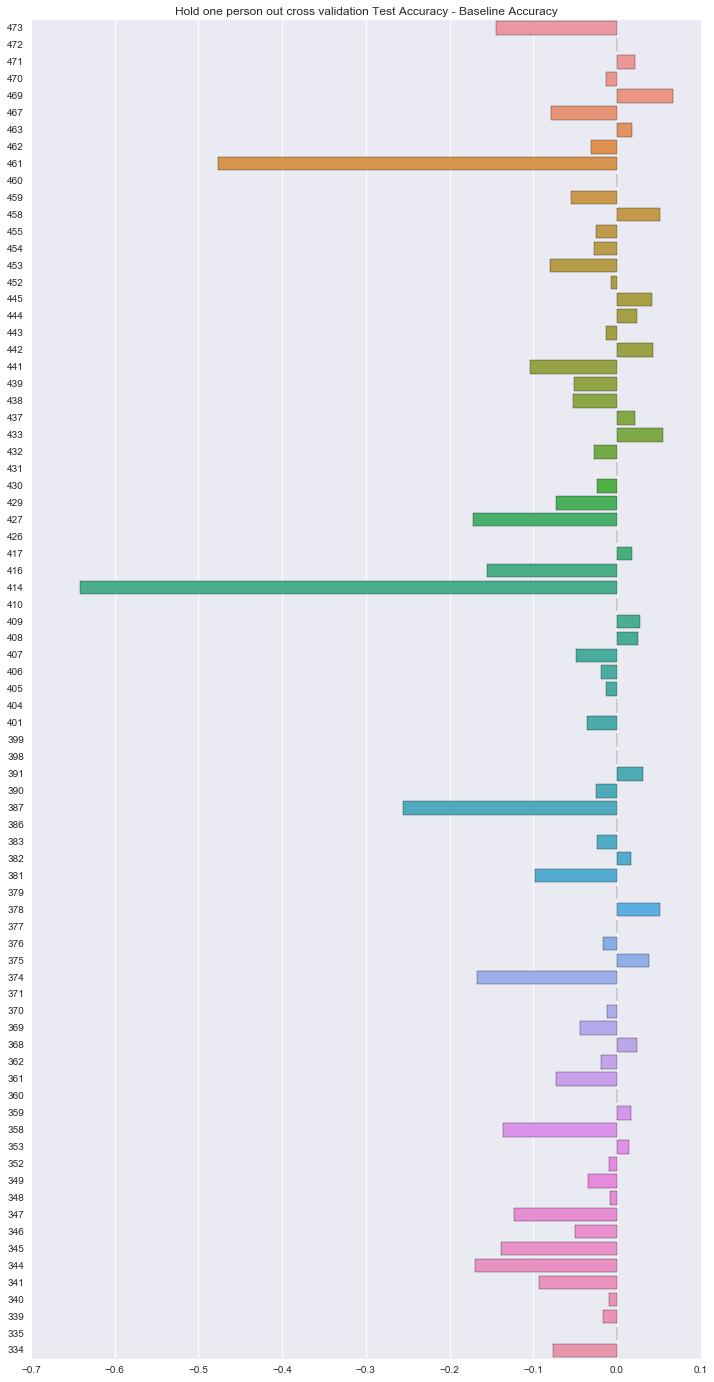

In [272]:
fig, ax = plt.subplots(1,1, figsize=(12,24))

ys = [50*y for y in range(len(old_bases.keys()))]
accs = [a-b for a,b in zip(old_scores.values(), old_bases.values())]
# ax.scatter(bases.values(), ys, color='b', label='Baseline')
# ax.scatter(scores.values(), ys, color='r', label='Accuracy')
sb.barplot(list(reversed(accs)), list(reversed(ys)), ax=ax, orient='h')
# ax.set_yticks(ys)
ax.set_yticklabels(list(reversed(bases.keys())))
plt.title('Hold one person out cross validation Test Accuracy - Baseline Accuracy')
# ax.legend()
# ax.set_ylim(-1,max(ys)+1)
plt.savefig('per_person_accuracies_wo_new_pids.pdf')
print

In [244]:
print len(old_pids)

79


In [246]:
# old_data = old_data.set_index(['person', 'turn'])
old_data.head()

text  label  Gender  \
pid turn                                                                     
221 1038  with food uh  ok so i think my worst experienc...      1     1.0   
    1039                     um  yes  yes  yes  no  amazon       1     1.0   
    1040                                               yes       1     1.0   
    1041                                               yes       0     1.0   
    1042                                              ipad       0     1.0   

          Language  Nscore_raw  Escore_raw  Oscore_raw  Ascore_raw  \
pid turn                                                             
221 1038       1.0   -1.097038    1.695875    1.101407   -0.601979   
    1039       1.0   -1.097038    1.695875    1.101407   -0.601979   
    1040       1.0   -1.097038    1.695875    1.101407   -0.601979   
    1041       1.0   -1.097038    1.695875    1.101407   -0.601979   
    1042       1.0   -1.097038    1.695875    1.101407   -0.601979   

          Cscore_raw  LIWC_funct_funcword                 ...                  \
pid turn                                                  ...                   
221 1038    0.152676             0.503150                 ...                   
    1039    0.152676            -0.762670                 ...                   
    1040    0.152676            -1.210428                 ...                   
    1041    0.152676            -1.210428                 ...                   
    1042    0.152676            -1.210428                 ...                   

          mfcc_sma_de[14]_peakRangeAbs  mfcc_sma_de[14]_peakRangeRel  \
pid turn                                                               
221 1038                      0.769310                     -0.057786   
    1039                      1.296354                      1.267020   
    1040                      0.459135                      1.398818   
    1041                     -0.280146                      0.252364   
    1042                     -0.047276                      0.428318   

          mfcc_sma_de[14]_peakMeanAbs  mfcc_sma_de[14]_peakMeanMeanDist  \
pid turn                                                                  
221 1038                    -0.741830                         -0.794863   
    1039                    -0.744008                         -0.796183   
    1040                    -0.981670                         -0.856293   
    1041                     0.028237                         -0.127445   
    1042                    -0.143415                         -0.068036   

          mfcc_sma_de[14]_peakMeanRel  mfcc_sma_de[14]_minRangeRel  \
pid turn                                                             
221 1038                    -3.740871                     0.661634   
    1039                    -0.858876                    -0.196223   
    1040                     0.113328                    -0.478835   
    1041                     0.130974                     0.264610   
    1042                     0.097924                    -0.133673   

          mfcc_sma_de[14]_meanRisingSlope  mfcc_sma_de[14]_stddevRisingSlope  \
pid turn                                                                       
221 1038                        -0.363109                           0.027114   
    1039                        -0.598939                          -0.120741   
    1040                         0.164538                           0.353147   
    1041                        -1.483217                          -1.372493   
    1042                        -0.093923                          -0.493900   

          mfcc_sma_de[14]_meanFallingSlope  mfcc_sma_de[14]_stddevFallingSlope  
pid turn                                                                        
221 1038                         -0.162984                           -0.398002  
    1039                         -0.127452                           -0.220887  
    1040                         -0.434510

In [270]:
old_train_pids = [221, 226, 228, 229, 230, 231, 245, 252, 253, 254, 255, 260, 261, 263, 265, 269, 270, 271, 272, 274, 277, 289, 299, 300, 302, 303, 307, 314, 315, 322, 330, 331, 334, 335, 340, 344, 345, 346, 347, 352, 360, 368, 369, 378, 379, 382, 383, 386, 387, 398, 399, 406, 407, 409, 410, 414, 429, 442, 443, 452, 453, 461, 472, 473]
old_test_pids = [220, 244, 262, 264, 268, 288, 298, 301, 306, 323, 353, 361, 362, 408, 460]

old_turns_train = old_turns_train.fillna(0.0)
old_turns_test = old_turns_test.fillna(0.0)
old_turns_train_x = old_turns_train.drop(noncovariates, axis=1).as_matrix()
old_turns_train_y = old_turns_train['label'].as_matrix()
old_turns_test_x = old_turns_test.drop(noncovariates, axis=1).as_matrix()
old_turns_test_y = old_turns_test['label'].as_matrix()

old_train_turns = old_turns_train.index.get_level_values(1).unique()
old_test_turns = old_turns_test.index.get_level_values(1).unique()

old_train_x = old_data[old_data.index.get_level_values('pid').isin(old_train_pids)&old_data.index.get_level_values(1).isin(old_train_turns)].drop(noncovariates, axis=1).as_matrix()
old_train_y = old_data[old_data.index.get_level_values('pid').isin(old_train_pids)&old_data.index.get_level_values(1).isin(old_train_turns)]['label'].as_matrix()
old_test_x = old_data[old_data.index.get_level_values('pid').isin(old_test_pids)&old_data.index.get_level_values(1).isin(old_test_turns)].drop(noncovariates, axis=1).as_matrix()
old_test_y = old_data[old_data.index.get_level_values('pid').isin(old_test_pids)&old_data.index.get_level_values(1).isin(old_test_turns)]['label'].as_matrix()
# old_train_x = old_data[old_data.index.get_level_values('pid').isin(old_train_pids)].drop(noncovariates, axis=1).as_matrix()
# old_train_y = old_data[old_data.index.get_level_values('pid').isin(old_train_pids)]['label'].as_matrix()
# old_test_x = old_data[old_data.index.get_level_values('pid').isin(old_test_pids)].drop(noncovariates, axis=1).as_matrix()
# old_test_y = old_data[old_data.index.get_level_values('pid').isin(old_test_pids)]['label'].as_matrix()



print np.isnan(old_train_x).any().any(), np.isnan(old_test_x).any().any()
print np.isnan(old_turns_train_x).any().any(), np.isnan(old_turns_test_x).any().any()

False False
False False


In [263]:
old_turns_train = old_turns_train.set_index(['person', 'turn'])
old_turns_test = old_turns_test.set_index(['person', 'turn'])

In [271]:
print old_train_x.shape, old_turns_train_x.shape
print set(old_turns_train.index.get_level_values(0).unique()) - set(old_train_pids) 
print old_test_x.shape, old_turns_test_x.shape


(2047, 6529) (2365, 6545)
set([])
(23, 6529) (463, 6545)


In [257]:
# label baselines for train and test
t, f = old_data[old_data.index.get_level_values('pid').isin(old_train_pids)]['label'].value_counts()
train_base = max([t,f])/float(sum([t,f]))
print "Training baseline: %2.4f" % train_base

t, f = old_data[~old_data.index.get_level_values('pid').isin(old_train_pids)]['label'].value_counts()
test_base = max([t,f])/float(sum([t,f]))
print "Test baseline: %2.4f" % test_base

t, f = old_turns_train['label'].value_counts()
turns_train_base = max([t,f])/float(sum([t,f]))
print "Training baseline: %2.4f" % turns_train_base

t, f = old_turns_test['label'].value_counts()
turns_test_base = max([t,f])/float(sum([t,f]))
print "Test baseline: %2.4f" % turns_test_base

class_names = ['Not Deceptive', 'Deceptive'] # 0 is truth, 1 is lie

Training baseline: 0.5888
Test baseline: 0.5965
Training baseline: 0.5328
Test baseline: 0.5659


In [157]:
all_train.head(1)

text  label  Gender  \
pid turn                                                                     
210 349   um i'm here for um summer research account pos...      0     0.0   

          Language  Nscore_raw    Escore_raw  Oscore_raw  Ascore_raw  \
pid turn                                                               
210 349        1.0    -0.41468  5.283557e-16   -0.219852    1.070787   

          Cscore_raw  LIWC_funct_funcword                 ...                  \
pid turn                                                  ...                   
210 349     0.746204            -0.978092                 ...                   

          mfcc_sma_de[14]_peakRangeAbs  mfcc_sma_de[14]_peakRangeRel  \
pid turn                                                               
210 349                      -0.398004                     -0.039079   

          mfcc_sma_de[14]_peakMeanAbs  mfcc_sma_de[14]_peakMeanMeanDist  \
pid turn                                                                  
210 349                     -0.910129                         -0.956817   

          mfcc_sma_de[14]_peakMeanRel  mfcc_sma_de[14]_minRangeRel  \
pid turn                                                             
210 349                     -0.104685                     1.099532   

          mfcc_sma_de[14]_meanRisingSlope  mfcc_sma_de[14]_stddevRisingSlope  \
pid turn                                                                       
210 349                          0.276155                           0.095361   

          mfcc_sma_de[14]_meanFallingSlope  mfcc_sma_de[14]_stddevFallingSlope  
pid turn                                                                        
210 349                           0.051525                           -0.500536  

[1 rows x 6531 columns]

In [158]:
noncovariates = ['label', 'text']
train_x = all_train.drop(noncovariates, axis=1).as_matrix()
train_y = all_train['label'].as_matrix()
test_x = all_test.drop(noncovariates, axis=1).as_matrix()
test_y = all_test['label'].as_matrix()

feature_labels = list(all_train.drop(noncovariates, axis=1).columns.values)
print train_x.shape, test_x.shape

(6995, 6529) (4678, 6529)


In [159]:
np.any(np.isnan(train_x)), np.any(np.isnan(train_y))

(False, False)

In [160]:
np.any(np.isnan(test_x)), np.any(np.isnan(test_y))

(False, False)

In [250]:
def experiment(clf, param_grid, grid_metric='accuracy',
               train_x=train_x, train_y=train_y, 
               test_x=test_x, test_y=test_y, 
               label_names=class_names, cv=10):
    """Run GridSearchCv on the pipeline `clf` with `cv` number of folds over `grid`
    
    Then refit the best parameters on all of the train data, and analyze the test performance
    
    Performance metrics: accuracy, f1-score for Deceptive, confusion matrix
    
    NOTE: Specify parallel jobs in clf.  Won't do grid search in parallel.
    """
    print "Searching Grid..."
    grid = GridSearchCV(clf, param_grid, grid_metric, cv=cv, verbose=1)
    grid.fit(train_x, train_y)
    print "Fitting best estimator..."
    print "Chosen parameters: \n", grid.best_params_
    print "Best Estimator: \n", grid.best_estimator_
    clf.set_params(**grid.best_params_)
    clf.fit(train_x, train_y)
    print "Evaluating on Test..."
    preds = clf.predict(test_x)
    acc = accuracy_score(test_y, preds)
    p = precision_score(test_y, preds)
    r = recall_score(test_y, preds)
    f1 = f1_score(test_y, preds)
    print "Test Accuracy: %1.4f, Test F1: %1.4f (P:%0.2f R:%0.2f)" % (acc, f1, p, r)
    confusion_matrix = cm(test_y, preds)
    results = {'clf': clf,
               'best_params':grid.best_params_,
               'grid_scores':grid.grid_scores_,
               'acc':acc,
               'f1':f1, 'precision':p, 'recall':r,
               'cm':confusion_matrix}
    return results

def plot_confusion_matrix(cm, label_names=class_names, save_name=None, 
                          title='Normed Confusion matrix', 
                          cmap=plt.cm.Blues, 
                          stats=None):
    """Take confusion matrix, label names and plot a very nice looking confusion matrix
    Args:
        cm: a confustion matrix w/ prediction rows and true columns
        label_names: list of class names for tick labels
        save_name (optional): if provided, save the figure to this location
        title (optional): the desired title
        cmap (optional): the colormap to display cell magnitudes with
        stats (optional): if stats, label class precisions and macro stats
    """
    fig, ax = plt.subplots(figsize=(6,6))
    
    # calc normalized cm
    x, y = np.meshgrid(range(cm.shape[0]), range(cm.shape[1]))
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    
    # print nonzero raw counts
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        norm = cm_normalized[x_val, y_val]
        c = "%i" % (cm.astype('int')[x_val, y_val])
        if norm > 0.0:
            color = 'white' if norm > .5 else 'black'
            ax.text(y_val, x_val, c, va='center', ha='center', color=color, fontsize=14)
    
    # actual plot
    im = ax.imshow(cm_normalized, interpolation='nearest', origin='upper', cmap=cmap)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    
    # set ticks and offset grid
    tick_marks = np.arange(len(label_names))
    tick_marks_offset = np.arange(len(label_names)) - .5
    ax.set_xticks(tick_marks, minor=False)
    ax.set_yticks(tick_marks, minor=False)
    ax.set_xticks(tick_marks_offset, minor=True)
    ax.set_yticks(tick_marks_offset, minor=True)
    ax.grid(which='minor')
    if stats:
        # include micro precisio, recall, and f1
        aug_y_labels = []
        for i in range(len(label_names)):
            aug = ("%s\nP:%0.2f, R:%0.2f, F1:%0.2f" 
                   % (label_names[i],
                      stats['class_precision'][i],
                      stats['class_recall'][i],
                      stats['class_f1'][i],))
            aug_y_labels.append(aug)
    else:
        aug_y_labels = label_names
    ax.set_xticklabels(label_names, horizontalalignment='left')
    ax.set_yticklabels(aug_y_labels)
    
    # other stuff
    plt.tight_layout()
    plt.ylabel('Predicted Labels', fontsize=16)
    if stats:
        # include macro 
        aug_x_label = ("True Labels\n Micro P:%0.2f, R:%0.2f, F1:%0.2f\n Macro P:%0.2f, R:%0.2f, F1:%0.2f" 
                       % (stats['micro_precision'], stats['micro_recall'], stats['micro_f1'],
                          stats['macro_precision'], stats['macro_recall'], stats['macro_f1']))
    else:
        aug_x_label = "True Label"
    plt.xlabel(aug_x_label, fontsize=16)
    plt.title(title, fontsize=18)
    if save_name:
        plt.savefig(save_name+'.pdf')
        
def plot_grid_scores(grid_scores, baseline=train_base):
    """Take grid scores and plot interactive box and whisker plot with baseline reference"""
    # determine endpoint of baseline
    cv_scores = [s[2] for s in grid_scores] # 2 is cross val scores
    labels = ["\n".join([str(val) for val in s[0].values()]) for s in grid_scores]
    x_label = ", ".join([str(key) for key in grid_scores[0][0].keys()])
    fig, ax = plt.subplots(figsize=(15,6))
    boxes = ax.boxplot(cv_scores)
    ax.hlines([baseline], [0], [len(grid_scores) + 1], linestyles='dashed', label='Baseline Accuracy')
    
    plt.legend(loc='best')
    ax.set_title("Cross Validation Scores")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel(x_label)
    ax.set_xticklabels(labels, fontsize=8)
    plt.show()

In [162]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix as cm

# Random Forest w/o pre-feature selection

In [254]:
### old data only
from sklearn.ensemble import RandomForestClassifier as RF

rf = RF(verbose=0, n_jobs=-1, random_state=random_seed)
param_grid =dict(n_estimators=[200],#[5, 10, 50, 100, 200, 300], 
                 criterion=['entropy'],
                 max_features=[10],#['log2', 'sqrt']
#                  max_depth=None, 
#                  min_samples_split=2, 
#                  min_samples_leaf=1, 
#                  min_weight_fraction_leaf=0.0, 
#                  max_features=['auto', 10], 
#                  max_leaf_nodes=None, 
#                  bootstrap=True, 
#                  oob_score=False, 
#                  n_jobs=1, 
#                  random_state=None, 
#                  verbose=0, 
#                  warm_start=False, 
#                  class_weight=None
                )
rf_results = experiment(rf, param_grid, cv=2,
                       train_x=old_train_x, train_y=old_train_y,
                       test_x=old_test_x, test_y=old_test_y)


Searching Grid...
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s finished


Fitting best estimator...
Chosen parameters: 
{'max_features': 10, 'n_estimators': 200, 'criterion': 'entropy'}
Best Estimator: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Evaluating on Test...
Test Accuracy: 0.5883, Test F1: 0.1302 (P:0.44 R:0.08)


In [163]:
from sklearn.ensemble import RandomForestClassifier as RF

rf = RF(verbose=0, n_jobs=-1, random_state=random_seed)
param_grid =dict(n_estimators=[200],#[5, 10, 50, 100, 200, 300], 
                 criterion=['entropy'],
                 max_features=[10],#['log2', 'sqrt']
#                  max_depth=None, 
#                  min_samples_split=2, 
#                  min_samples_leaf=1, 
#                  min_weight_fraction_leaf=0.0, 
#                  max_features=['auto', 10], 
#                  max_leaf_nodes=None, 
#                  bootstrap=True, 
#                  oob_score=False, 
#                  n_jobs=1, 
#                  random_state=None, 
#                  verbose=0, 
#                  warm_start=False, 
#                  class_weight=None
                )
rf_results = experiment(rf, param_grid, cv=2)


Searching Grid...
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s finished


Fitting best estimator...
Chosen parameters: 
{'max_features': 10, 'n_estimators': 200, 'criterion': 'entropy'}
Best Estimator: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Evaluating on Test...
Test Accuracy: 0.5866, Test F1: 0.1079 (P:0.49 R:0.06)


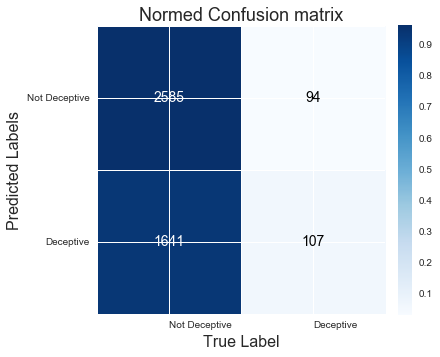

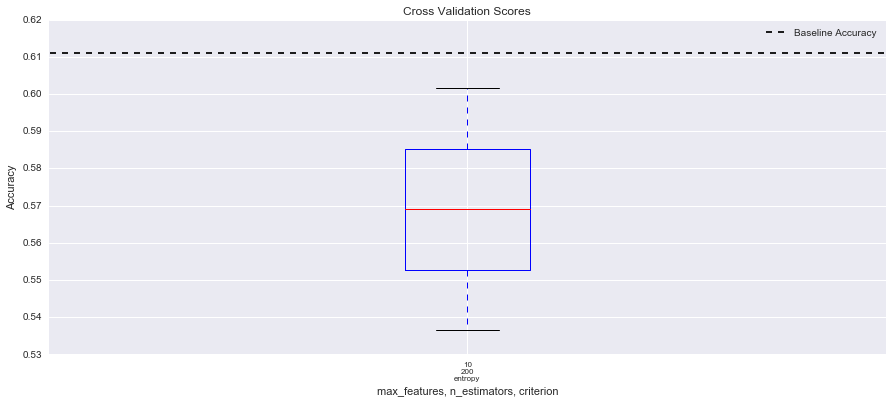

In [32]:
plot_confusion_matrix(rf_results['cm'])
plot_grid_scores(rf_results['grid_scores'])

In [53]:
imports = sorted(zip(feature_labels, rf_results['clf'].feature_importances_), key=lambda x:x[1], reverse=True)
for l, f in imports[:100]:
    print "%2.4f : %s" % (f,l)

0.0003 : LIWC_past_funcword
0.0003 : pcm_Mag_spectralRollOff25.0_sma_minRangeRel
0.0003 : audSpec_Rfilt_sma_de[6]_lpc1
0.0003 : LIWC_shehe
0.0003 : audSpec_Rfilt_sma[17]_lpc2
0.0003 : audSpec_Rfilt_sma[23]_maxPos
0.0003 : pcm_Mag_spectralRollOff90.0_sma_de_lpc2
0.0003 : mfcc_sma[4]_peakMeanRel
0.0003 : mfcc_sma[14]_linregerrQ
0.0003 : mfcc_sma[2]_linregerrQ
0.0003 : audSpec_Rfilt_sma[17]_lpc0
0.0003 : mfcc_sma_de[12]_risetime
0.0003 : mfcc_sma_de[12]_peakMeanRel
0.0003 : pcm_Mag_spectralEntropy_sma_de_upleveltime90
0.0003 : mfcc_sma_de[6]_upleveltime25
0.0003 : audSpec_Rfilt_sma[0]_lpc1
0.0003 : mfcc_sma[13]_lpc4
0.0003 : audSpec_Rfilt_sma_de[10]_maxSegLen
0.0003 : pcm_Mag_fband250-650_sma_percentile1.0
0.0003 : mfcc_sma[8]_peakMeanRel
0.0003 : mfcc_sma[13]_stddevRisingSlope
0.0002 : pcm_Mag_spectralRollOff90.0_sma_stddev
0.0002 : pcm_Mag_spectralSkewness_sma_upleveltime50
0.0002 : pcm_zcr_sma_percentile1.0
0.0002 : audSpec_Rfilt_sma[22]_lpc3
0.0002 : mfcc_sma[11]_linregc1
0.0002 : pcm

## Kernel SVM

In [34]:
from sklearn.svm import SVC

svm = SVC(random_seed)
param_grid = dict(C=np.logspace(-4,4,9), 
                  kernel=['linear','rbf','poly'], 
#                   degree=3, 
#                   gamma='auto', 
#                   coef0=0.0, 
#                   shrinking=True, 
#                   probability=False, 
#                   tol=0.001, 
#                   cache_size=200, 
#                   class_weight=None, 
#                   verbose=False, 
#                   max_iter=-1, 
#                   decision_function_shape=None, 
#                   random_state=random_seed
                 )
svm_results = experiment(svm, param_grid, cv=5)


Searching Grid...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed: 279.3min
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 921.6min finished


Fitting best estimator...
Chosen parameters: 
{'kernel': 'linear', 'C': 0.0001}
Best Estimator: 
SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Evaluating on Test...
Test Accuracy: 0.6061, Test F1: 0.0501 (P:0.52 R:0.03)


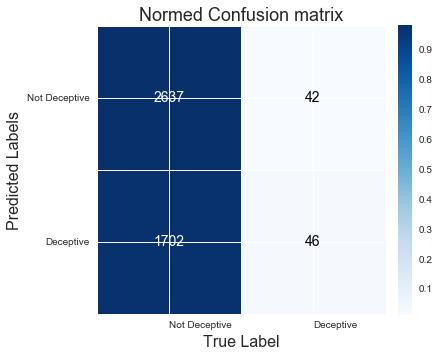

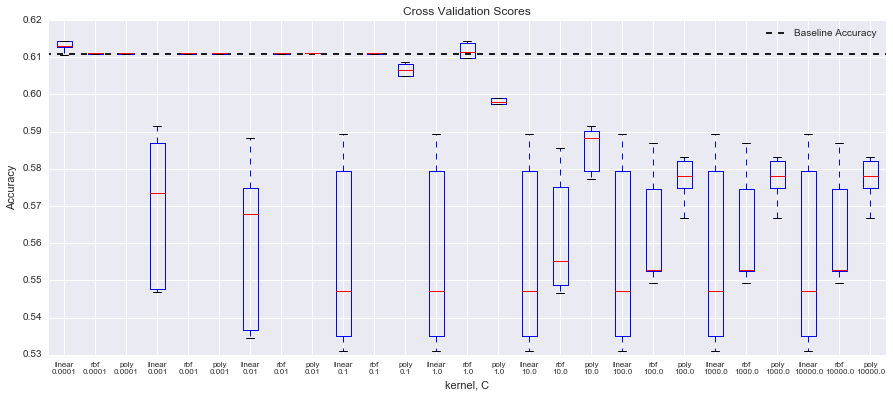

In [35]:
plot_confusion_matrix(svm_results['cm'])
plot_grid_scores(svm_results['grid_scores'])

## Per person feature selection with LassoCV

In [26]:
train_pids = all_train.index.get_level_values(level=0).unique()

In [31]:
from sklearn.linear_model import LogisticRegressionCV as LRCV
train_pids = all_train.index.get_level_values(level=0).unique()

In [100]:
lrs = {}
for i, pid in enumerate(train_pids):
    lrcv = LRCV(penalty='l1', n_jobs=-1, refit=False, random_state=random_seed, solver='liblinear')
    X = all_train[all_train.index.get_level_values('pid') == pid].drop(noncovariates, axis=1).as_matrix()
    y = all_train[all_train.index.get_level_values('pid') == pid]['label'].as_matrix()
    print "%i :: PID: %i, n: %r" % (i, pid, X.shape[0])
    lrcv.fit(X, y)
    lrs[pid] = lrcv

0 :: PID: 205, n: 134
1 :: PID: 210, n: 86
2 :: PID: 213, n: 39
3 :: PID: 212, n: 31
4 :: PID: 225, n: 70
5 :: PID: 216, n: 34
6 :: PID: 221, n: 79
7 :: PID: 220, n: 117
8 :: PID: 236, n: 122
9 :: PID: 224, n: 42
10 :: PID: 229, n: 41
11 :: PID: 226, n: 113
12 :: PID: 228, n: 51
13 :: PID: 231, n: 59
14 :: PID: 230, n: 61
15 :: PID: 237, n: 101
16 :: PID: 243, n: 87
17 :: PID: 242, n: 39
18 :: PID: 245, n: 36
19 :: PID: 244, n: 40
20 :: PID: 248, n: 91
21 :: PID: 246, n: 80
22 :: PID: 249, n: 60
23 :: PID: 257, n: 113
24 :: PID: 253, n: 62
25 :: PID: 252, n: 107
26 :: PID: 255, n: 158
27 :: PID: 254, n: 84
28 :: PID: 279, n: 49
29 :: PID: 256, n: 114
30 :: PID: 261, n: 79
31 :: PID: 260, n: 93
32 :: PID: 263, n: 51
33 :: PID: 262, n: 45
34 :: PID: 264, n: 54
35 :: PID: 265, n: 96
36 :: PID: 269, n: 55
37 :: PID: 268, n: 47
38 :: PID: 271, n: 39
39 :: PID: 270, n: 39
40 :: PID: 273, n: 66
41 :: PID: 272, n: 36
42 :: PID: 274, n: 146
43 :: PID: 277, n: 144
44 :: PID: 278, n: 58
45 :: PID

In [34]:
lrs.values()

[LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
            fit_intercept=True, intercept_scaling=1.0, max_iter=100,
            multi_class='ovr', n_jobs=-1, penalty='l1', random_state=42,
            refit=True, scoring=None, solver='liblinear', tol=0.0001,
            verbose=2),
 LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
            fit_intercept=True, intercept_scaling=1.0, max_iter=100,
            multi_class='ovr', n_jobs=-1, penalty='l1', random_state=42,
            refit=True, scoring=None, solver='liblinear', tol=0.0001,
            verbose=2),
 LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
            fit_intercept=True, intercept_scaling=1.0, max_iter=100,
            multi_class='ovr', n_jobs=-1, penalty='l1', random_state=42,
            refit=True, scoring=None, solver='liblinear', tol=0.0001,
            verbose=2),
 LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
            fit_

In [41]:
path = lrs.values()[0].coefs_paths_[1]
path.shape

(3, 10, 6530)

In [42]:
avg = np.mean(path, axis=0)
avg.shape

(10, 6530)

 ...]

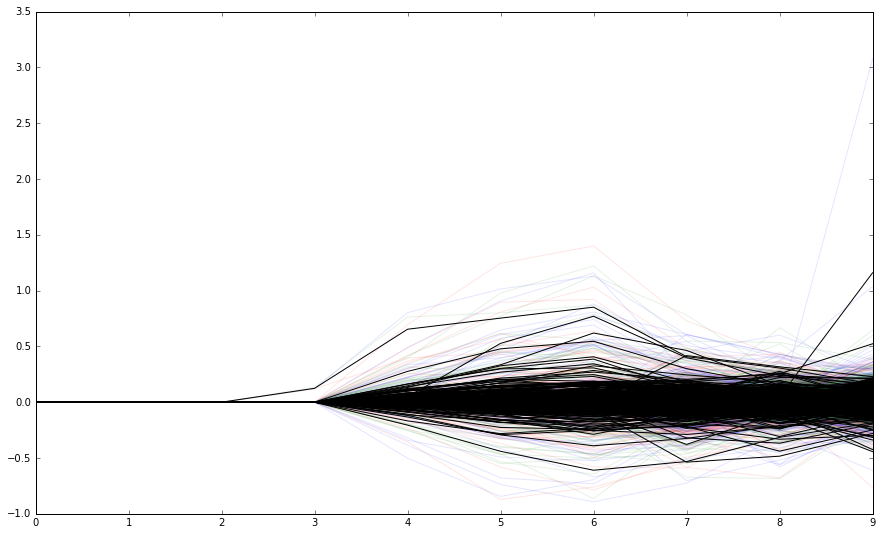

In [52]:
fig, ax = plt.subplots(figsize=(15,9))
colors = ['r', 'b', 'g']
for i in range(3):
    plt.plot(path[i,:,:], color=colors[i], alpha=.1)
plt.plot(avg, color='k')

In [78]:
b = lrs.values()[0].coef_.reshape(-1)
len(b)

6529

In [101]:
betas = np.concatenate([v.coef_ for v in lrs.values()])
betas.shape

(111, 6529)

(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 500)
(111, 29)


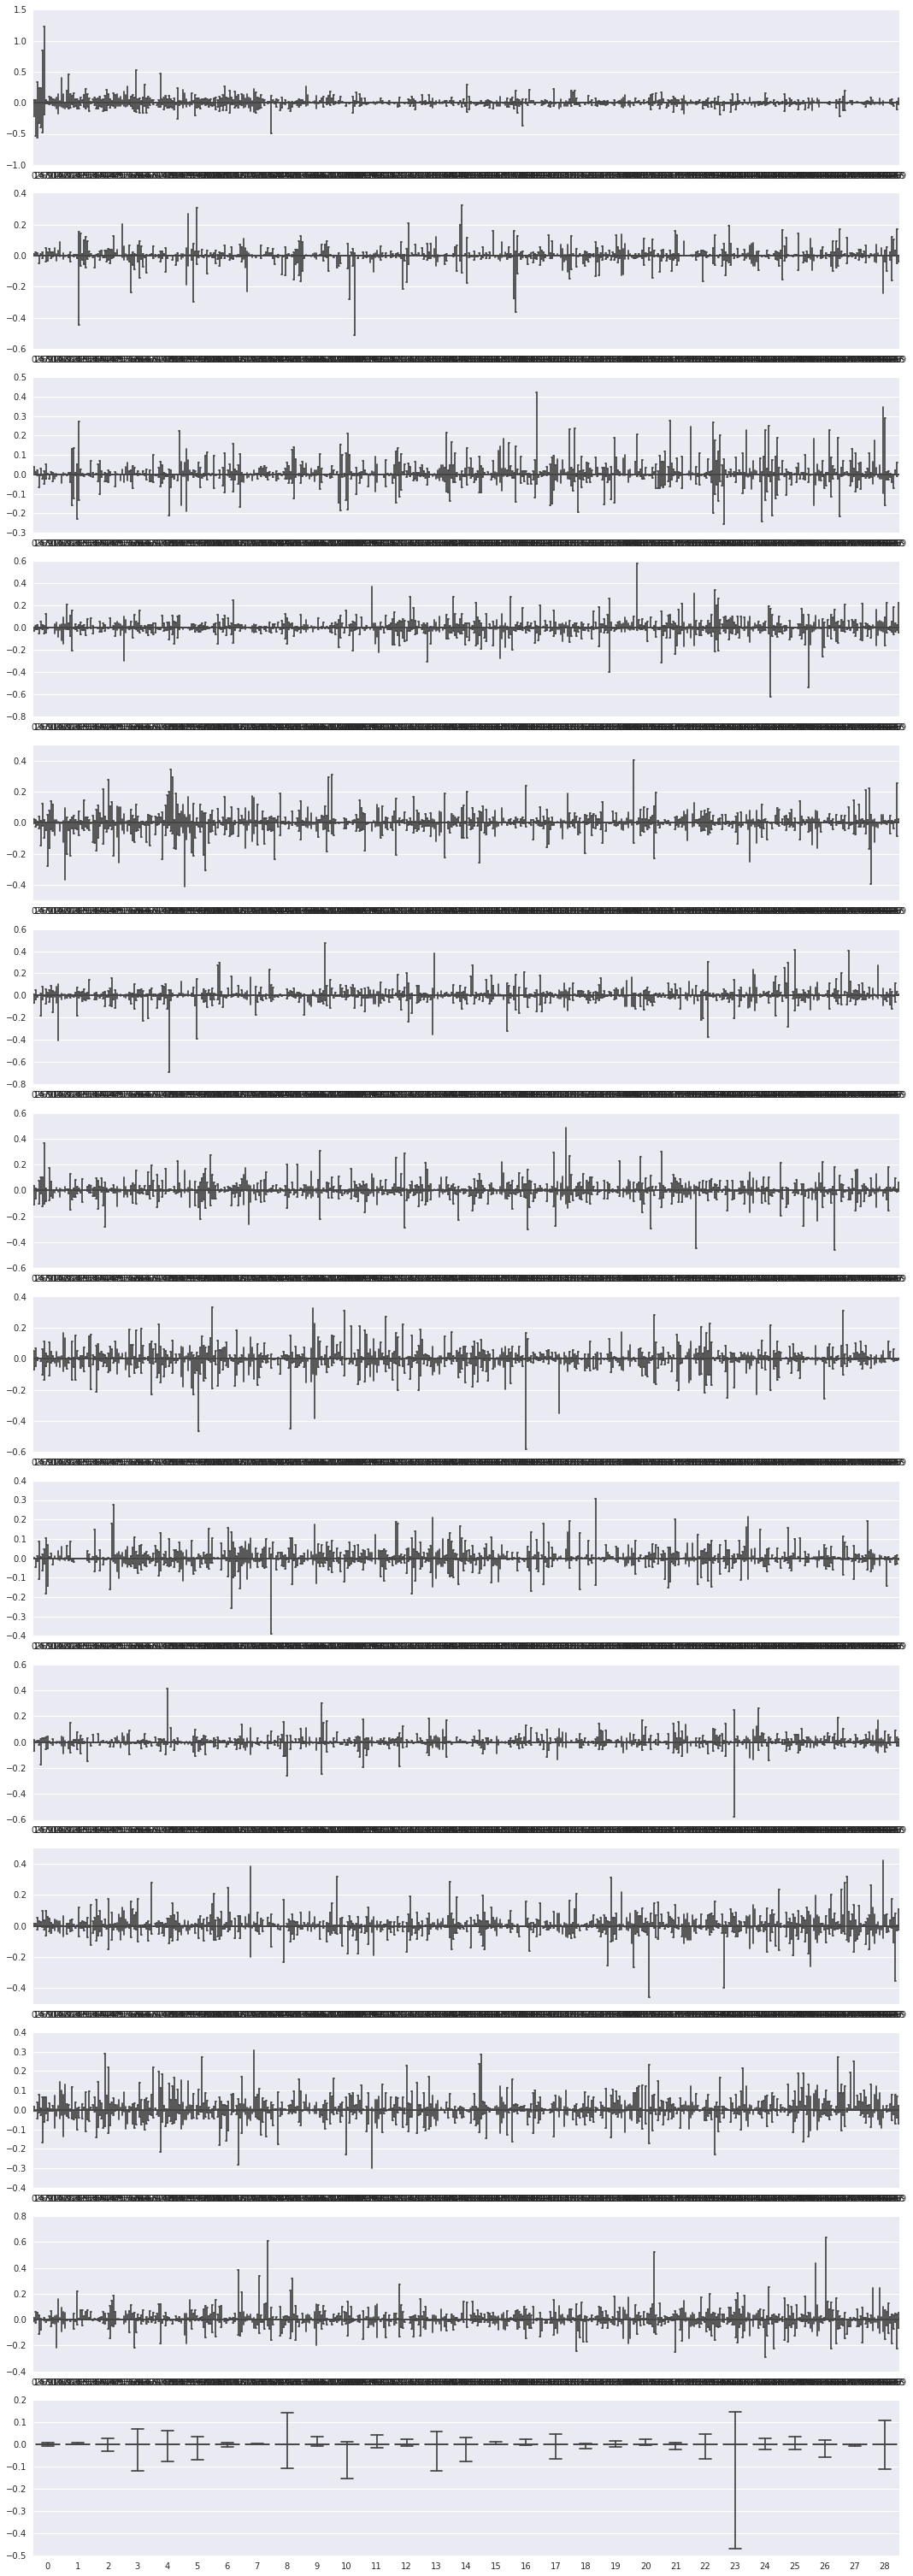

In [102]:
stride = 500
num_plots = betas.shape[1] // stride + 1
fig, ax = plt.subplots(num_plots,1, figsize=(15,3*num_plots))
for i in range(num_plots):
    minibetas = betas[:,i*stride:(i+1)*stride]
    print minibetas.shape
    sb.boxplot(data=minibetas, ax=ax[i])
plt.tight_layout()

In [103]:
# proportion that are allzeros
nonzero_betas = len([v.coef_ for v in lrs.values() if np.sum(v.coef_) > 0.0])
nonzero_betas, len(lrs.values()), nonzero_betas/float(len(lrs.values()))

(59, 111, 0.5315315315315315)

### Signal appears to be sparse, and highly variable across people

## Stability analysis across all training people

In [66]:
from sklearn.linear_model import RandomizedLogisticRegression as RLR
from sklearn.linear_model import lasso_stability_path

# supress all warnings because thise package is old and things have been deprecated
import warnings
warnings.filterwarnings('ignore')

In [67]:
Cs = np.logspace(-4,5,10)
all_rlr = RLR(C=Cs,
          scaling=.5,
          sample_fraction=.2,#.75, 
          n_resampling=100,
          selection_threshold=.5,#.75,
          normalize=False,
          random_state=random_seed,
          n_jobs=1,
          verbose=5)
%time all_rlr.fit(train_x, train_y)
print "DONE"

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  6.9min


CPU times: user 8min 12s, sys: 1min 23s, total: 9min 36s
Wall time: 9min 38s
DONE


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.6min finished


In [68]:
c_idx = list(Cs).index(1)

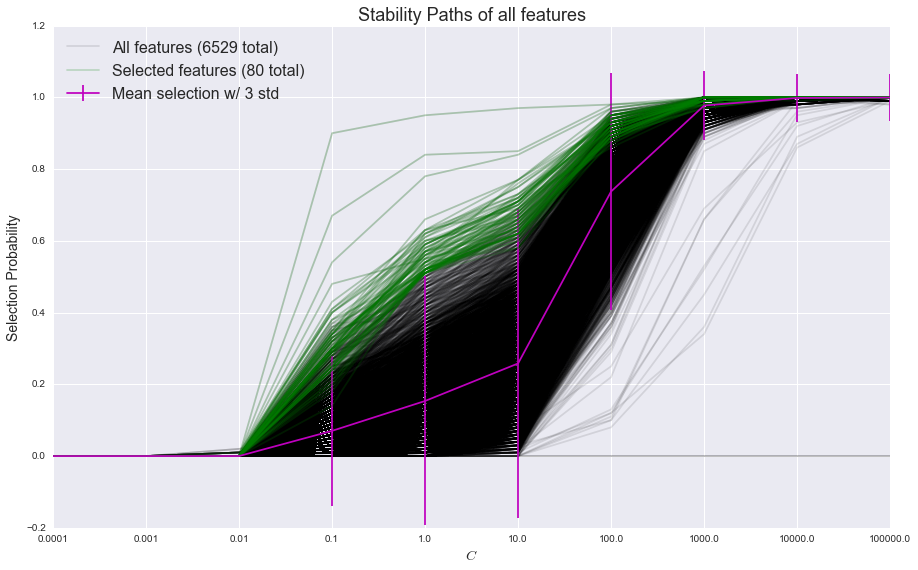

In [104]:
scores =all_rlr.all_scores_
avg = np.mean(scores.T, axis=1)
std = np.std(scores.T, axis=1)

# get the scores that are greater than 3 stddevs above average in at least one experiment
num_std = 3
thresh = avg + num_std*std
select_mask = scores[:, c_idx] > thresh[c_idx]
# print select_mask[:150]
above = scores[select_mask]
# print rlr.all_scores_.T.shape, above.shape

fig, ax = plt.subplots(1,1, figsize=(15,9))
ax.grid(zorder=0)
s = ax.plot(scores.T, 'k', alpha=.1, zorder=1, label=('All features (%i total)'%scores.shape[0]))
a = ax.plot(above.T, 'g', alpha=.2, label=('Selected features (%i total)'%above.shape[0]))
ax.set_xticks(range(len(Cs)))
ax.set_xticklabels(Cs)
e = ax.errorbar(range(len(Cs)), avg, yerr=num_std*std, color='m', ecolor='m', zorder=2, label='Mean selection w/ 3 std')
ax.set_title("Stability Paths of all features", fontsize=18)
ax.set_xlabel('$C$', fontsize=14)
ax.set_ylabel('Selection Probability', fontsize=14)
ax.legend(handles=[s[0], a[0], e], loc='best', fontsize=16)
plt.savefig('stability_paths.pdf')

In [70]:
mean_scores = np.mean(all_rlr.all_scores_, axis=1)
c_scores = all_rlr.all_scores_[:,c_idx]

In [71]:
fig, ax = plt.subplots(1,1, figsize=(9,9))
colors = ['b', 'r', 'g', 'm']
sizes = np.cumsum([0, 
         neo['train'].shape[1]-2,
         liwc['train'].shape[1]-6,
         dal['train'].shape[1]-3,
         is13['train'].shape[1]-3])
sets = ['Neo', 'LIWC', 'DAL', 'OpenSmile']
labels = list(all_train.drop(noncovariates, axis=1).columns.values)


# print labels[:200]
for i in range(len(sizes)-1):
    left = sizes[i]
    right = sizes[i+1]
    scatter = ax.scatter(range(left, right), mean_scores[left:right], alpha=.5, color=colors[i], label=sets[i])

    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels[left:right])
    mpld3.plugins.connect(fig, tooltip)
    
l = ax.legend(fancybox=0)
ax.set_title('Mean Selection Probabilities')
for i, text in enumerate(l.get_texts()):
    text.set_color(colors[i])
mpld3.display()

In [81]:
print list(np.array(labels)[select_mask])
print list(above[:,c_idx])

['Nscore_raw', 'Oscore_raw', 'Ascore_raw', 'Cscore_raw', 'LIWC_tentat_funcword', 'pcm_zcr_sma_minPos', 'audspec_lengthL1norm_sma_de_minPos', 'audSpec_Rfilt_sma[0]_minPos', 'audSpec_Rfilt_sma[0]_lpc4', 'audSpec_Rfilt_sma[2]_minPos', 'audSpec_Rfilt_sma[10]_maxPos', 'mfcc_sma[5]_maxPos', 'mfcc_sma[6]_minPos', 'mfcc_sma[7]_minPos', 'mfcc_sma[10]_maxPos', 'mfcc_sma[11]_minPos', 'mfcc_sma[12]_maxPos', 'mfcc_sma[13]_maxPos', 'audSpec_Rfilt_sma_de[3]_upleveltime25', 'audSpec_Rfilt_sma_de[19]_minSegLen', 'audSpec_Rfilt_sma_de[24]_minSegLen', 'pcm_Mag_spectralEntropy_sma_de_maxPos', 'pcm_Mag_harmonicity_sma_de_minPos', 'mfcc_sma_de[1]_minPos', 'mfcc_sma_de[2]_maxPos', 'mfcc_sma_de[2]_minPos', 'mfcc_sma_de[3]_leftctime', 'mfcc_sma_de[4]_maxPos', 'mfcc_sma_de[4]_minPos', 'mfcc_sma_de[5]_maxPos', 'mfcc_sma_de[8]_maxPos', 'mfcc_sma_de[8]_minPos', 'mfcc_sma_de[9]_maxPos', 'mfcc_sma_de[9]_minPos', 'mfcc_sma_de[10]_minPos', 'mfcc_sma_de[11]_maxPos', 'mfcc_sma_de[13]_minPos', 'mfcc_sma_de[14]_maxPos', '

In [109]:
stability_labels = []
for s, l in sorted(zip(list(above[:,c_idx]), list(np.array(labels)[select_mask])), key=lambda x:x[0], reverse=True)[:10]:
    print '%s & %2.4f \\\\\n\\hline' %(l,s)
    stability_labels.append(l)

Ascore_raw & 0.9500 \\
\hline
Cscore_raw & 0.8400 \\
\hline
mfcc_sma_de[7]_peakMeanRel & 0.7800 \\
\hline
audSpec_Rfilt_sma_de[22]_peakMeanRel & 0.6600 \\
\hline
mfcc_sma[6]_minPos & 0.6300 \\
\hline
audSpec_Rfilt_sma_de[13]_peakMeanRel & 0.6300 \\
\hline
mfcc_sma_de[5]_peakMeanRel & 0.6300 \\
\hline
mfcc_sma[12]_maxPos & 0.6200 \\
\hline
mfcc_sma_de[4]_maxPos & 0.6200 \\
\hline
pcm_Mag_spectralKurtosis_sma_de_peakMeanRel & 0.6200 \\
\hline


In [93]:
rf_labels = []
for s, l in sorted(zip(list(rf_results['clf'].feature_importances_), labels), key=lambda x:x[0], reverse=True)[:len(stability_labels)]:
#     print '%2.8f : %s' %(s, l)
    rf_labels.append(l)

In [98]:
stab_set = set(stability_labels)
rf_set = set(rf_labels)
jaccard = len(stab_set & rf_set) / float(len(stab_set | rf_set))
print jaccard
print stab_set & rf_set

0.0191082802548
set(['mfcc_sma[8]_centroid', 'LIWC_tentat_funcword', 'mfcc_sma[8]_peakMeanRel'])


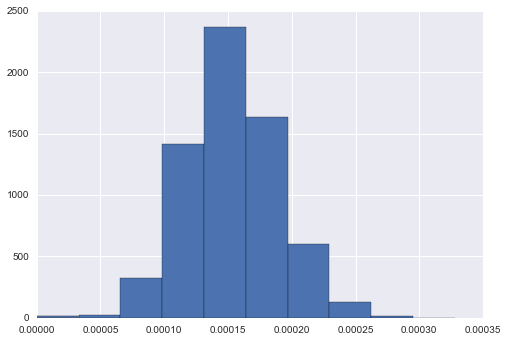

In [100]:
pd.Series(rf_results['clf'].feature_importances_).hist()

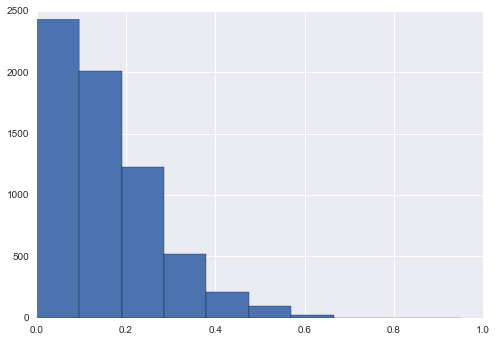

In [102]:
pd.Series(scores[:,c_idx]).hist()

0.259107060806


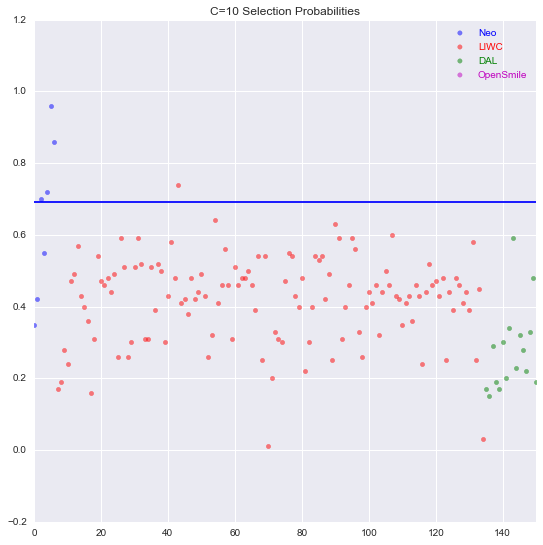

In [214]:
fig, ax = plt.subplots(1,1, figsize=(9,9))
colors = ['b', 'r', 'g', 'm']
sizes = np.cumsum([0, 
         neo['train'].shape[1]-2,
         liwc['train'].shape[1]-6,
         dal['train'].shape[1]-3,
         is13['train'].shape[1]-3])
sets = ['Neo', 'LIWC', 'DAL', 'OpenSmile']
labels = list(all_train.drop(noncovariates, axis=1).columns.values)
# print labels[:200]
for i in range(len(sizes)-1):
    left = sizes[i]
    right = sizes[i+1]
    scatter = ax.scatter(range(left, right), c_scores[left:right], alpha=.5, color=colors[i], label=sets[i])

#     tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels[left:right])
#     mpld3.plugins.connect(fig, tooltip)
    
a = avg[c_idx]
print a
s = std[c_idx]
ax.axhline(y=a+3*s, xmin=0, xmax=7000)    
ax.set_xlim(0,150)
l = ax.legend(fancybox=0)
ax.set_title('C=10 Selection Probabilities')
for i, text in enumerate(l.get_texts()):
    text.set_color(colors[i])
# mpld3.display()

### Now fit Ridge Regression w/  and w/o stability selected features

In [255]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(verbose=0, n_jobs=-1, random_state=random_seed)
param_grid = dict(
                  penalty=['l2'], 
#                   dual=False, 
#                   tol=0.0001, 
                  C=[1],#Cs, 
#                   fit_intercept=True, 
#                   intercept_scaling=1, 
#                   class_weight=None, 
#                   random_state=random_seed, 
#                   solver='liblinear', 
#                   max_iter=100, 
#                   multi_class='ovr', 
#                   verbose=0, 
#                   warm_start=False, 
#                   n_jobs=1
                 )

print select_mask
sm_train_x = train_x[:,select_mask]
sm_test_x = test_x[:, select_mask]
print sm_train_x.shape
lr2_results = experiment(lr, param_grid,
                         train_x=sm_train_x, 
                         test_x=sm_test_x, cv=5)

[False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
(7246, 2)
Searching Grid...
Fitting 5 folds for ea

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


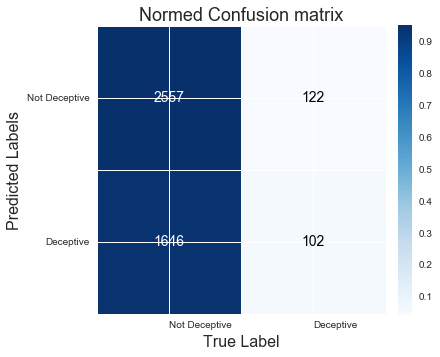

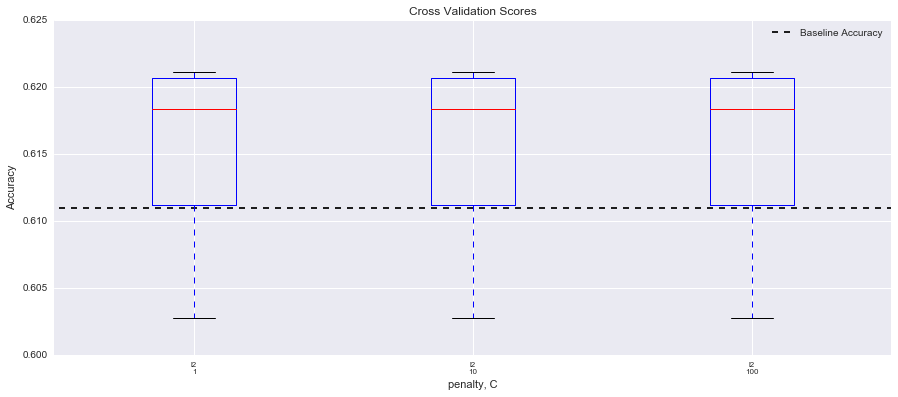

In [202]:
plot_confusion_matrix(lr2_results['cm'])
plot_grid_scores(lr2_results['grid_scores'])

In [64]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(verbose=0, n_jobs=-1, random_state=random_seed)
param_grid = dict(
                  penalty=['l2'], 
#                   dual=False, 
#                   tol=0.0001, 
                  C=Cs, 
#                   fit_intercept=True, 
#                   intercept_scaling=1, 
#                   class_weight=None, 
#                   random_state=random_seed, 
#                   solver='liblinear', 
#                   max_iter=100, 
#                   multi_class='ovr', 
#                   verbose=0, 
#                   warm_start=False, 
#                   n_jobs=1
                 )
lr_all_results = experiment(lr, param_grid, cv=5)

Searching Grid...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [62]:
plot_confusion_matrix(lr_all_results['cm'])
plot_grid_scores(lr_all_results['grid_scores'])

NameError: name 'lr_all_results' is not defined

In [256]:
imports = sorted(zip(list(np.array(feature_labels)[select_mask]), 
                     list(lr2_results['clf'].coef_.reshape(-1))), 
                 key=lambda x:x[1], reverse=True)
for i, (l, f) in enumerate(imports[:30]):
    print "%i :: %2.4f : %s" % (i, f,l)

0 :: 0.0982 : Cscore_raw
1 :: -0.1271 : Ascore_raw


In [66]:
all_imports = sorted(zip(feature_labels, list(lr_all_results['clf'].coef_.reshape(-1))), key=lambda x:x[1], reverse=True)
for l, f in all_imports[:20]:
    print "%2.4f : %s" % (f,l)

2.3726 : pcm_zcr_sma_linregc1
2.3515 : pcm_Mag_harmonicity_sma_de_meanSegLen
2.2154 : pcm_Mag_fband250-650_sma_de_peakRangeAbs
2.1410 : audspec_lengthL1norm_sma_minSegLen
2.1079 : pcm_Mag_harmonicity_sma_qregc1
2.0465 : jitterLocal_sma_de_quartile1
2.0438 : pcm_Mag_spectralEntropy_sma_de_peakRangeAbs
2.0274 : mfcc_sma_de[9]_upleveltime25
2.0157 : jitterDDP_sma_upleveltime50
2.0018 : audSpec_Rfilt_sma_de[16]_lpgain
1.9997 : pcm_Mag_spectralKurtosis_sma_de_upleveltime25
1.9888 : audSpec_Rfilt_sma[10]_quartile1
1.9812 : audSpec_Rfilt_sma_de[0]_percentile1.0
1.9732 : pcm_Mag_spectralFlux_sma_percentile1.0
1.9641 : audspec_lengthL1norm_sma_de_posamean
1.9172 : pcm_Mag_spectralEntropy_sma_de_lpgain
1.9072 : pcm_Mag_spectralSlope_sma_de_iqr1-2
1.8924 : pcm_Mag_harmonicity_sma_range
1.8719 : audSpec_Rfilt_sma_de[21]_posamean
1.8173 : LIWC_assent


## Random Forest with stability selectiom

In [208]:
# RF with preselcted by sta
rf = RF(verbose=0, n_jobs=-1, random_state=random_seed)
param_grid =dict(n_estimators=[200],#[5, 10, 50, 100, 200, 300], 
                 criterion=['entropy'],
                 max_features=[None],#['log2', 'sqrt']
#                  max_depth=None, 
#                  min_samples_split=2, 
#                  min_samples_leaf=1, 
#                  min_weight_fraction_leaf=0.0, 
#                  max_features=['auto', 10], 
#                  max_leaf_nodes=None, 
#                  bootstrap=True, 
#                  oob_score=False, 
#                  n_jobs=1, 
#                  random_state=None, 
#                  verbose=0, 
#                  warm_start=False, 
#                  class_weight=None
                )
rf_results = experiment(rf, param_grid, 
                        train_x=sm_train_x, test_x=sm_test_x,
                        cv=10)

Searching Grid...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished


Fitting best estimator...
Chosen parameters: 
{'max_features': None, 'n_estimators': 200, 'criterion': 'entropy'}
Best Estimator: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Evaluating on Test...
Test Accuracy: 0.5909, Test F1: 0.1787 (P:0.43 R:0.11)


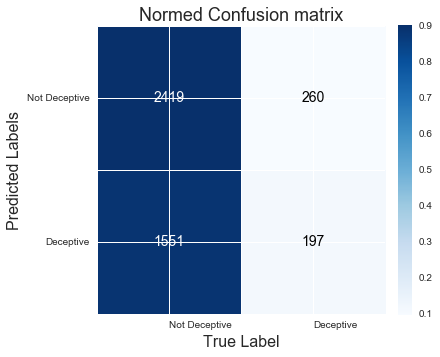

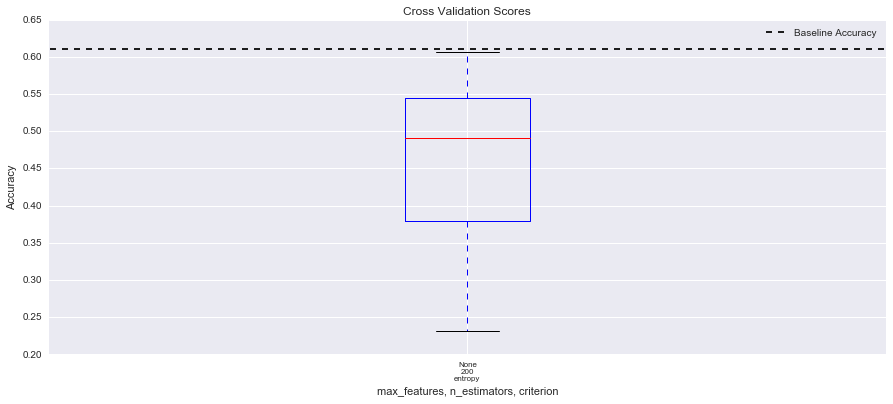

In [209]:
plot_confusion_matrix(rf_results['cm'])
plot_grid_scores(rf_results['grid_scores'])

In [218]:
imports = sorted(zip(list(np.array(feature_labels)[select_mask]), 
                     list(rf_results['clf'].feature_importances_.reshape(-1))), 
                 key=lambda x:x[1], reverse=True)
for i, (l, f) in enumerate(imports[:30]):
    print "%i :: %2.4f : %s" % (i, f,l)

0 :: 0.0470 : mfcc_sma[8]_maxPos
1 :: 0.0468 : mfcc_sma[12]_maxPos
2 :: 0.0459 : mfcc_sma_de[4]_maxPos
3 :: 0.0459 : mfcc_sma_de[9]_maxPos
4 :: 0.0443 : mfcc_sma[7]_minPos
5 :: 0.0439 : mfcc_sma[6]_minPos
6 :: 0.0439 : mfcc_sma_de[14]_maxPos
7 :: 0.0436 : pcm_Mag_harmonicity_sma_de_minPos
8 :: 0.0435 : audSpec_Rfilt_sma_de[22]_peakMeanRel
9 :: 0.0418 : pcm_Mag_spectralVariance_sma_de_peakMeanRel
10 :: 0.0414 : mfcc_sma_de[5]_peakMeanRel
11 :: 0.0412 : mfcc_sma_de[7]_peakMeanRel
12 :: 0.0412 : mfcc_sma_de[12]_peakMeanRel
13 :: 0.0410 : mfcc_sma_de[2]_peakMeanRel
14 :: 0.0409 : pcm_Mag_spectralSlope_sma_de_peakMeanRel
15 :: 0.0395 : pcm_Mag_spectralKurtosis_sma_de_peakMeanRel
16 :: 0.0392 : mfcc_sma_de[8]_peakMeanRel
17 :: 0.0383 : audSpec_Rfilt_sma_de[8]_peakMeanRel
18 :: 0.0381 : audSpec_Rfilt_sma_de[23]_peakMeanRel
19 :: 0.0374 : audSpec_Rfilt_sma_de[18]_peakMeanRel
20 :: 0.0292 : audSpec_Rfilt_sma_de[19]_minSegLen
21 :: 0.0281 : jitterLocal_sma_de_lpc4
22 :: 0.0276 : LIWC_tentat_func

## Clustering of per person covariates using stability selection analysis

In [85]:
train_pids = all_train.index.get_level_values(level=0).unique()

In [86]:
all_train[all_train.index.get_level_values('pid') == 268]['label'].as_matrix()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [87]:
rlrs = {}
for i, pid in enumerate(train_pids[:]):
    X = all_train[all_train.index.get_level_values('pid') == pid].drop(noncovariates, axis=1).as_matrix()
    y = all_train[all_train.index.get_level_values('pid') == pid]['label'].as_matrix()
    if len(np.unique(y)) < 2: 
        print "Bad PID: %i" % pid
        continue
    Cs = np.logspace(-4,5,10)
    rlr = RLR(C=Cs,
          scaling=.5,
          sample_fraction=.5,#.75, 
          n_resampling=200,
          selection_threshold=.5,#.75,
          normalize=False,
          random_state=random_seed,
          n_jobs=1)    
    print "%i :: PID: %i, n: %r" % (i, pid, X.shape[0])
#     lsp = lasso_stability_path(X, y,
#                                scaling=.5,
#                                random_state=random_seed,
#                                n_resampling=5,#200,
#                                n_grid=5,#100,
#                                sample_fraction=0.5,#0.75,
#                                eps =.1,
#                                n_jobs=-1,
#                                verbose=True)
    try:
        rlr.fit(X, y)
    except ValueError:
        print "Subsampling Value Error for Bad PID: %i" % pid
        continue
    rlrs[pid] = rlr
print "DONE"

0 :: PID: 205, n: 134
1 :: PID: 210, n: 86
2 :: PID: 213, n: 39
3 :: PID: 212, n: 31
4 :: PID: 225, n: 70
5 :: PID: 216, n: 34
6 :: PID: 221, n: 79
7 :: PID: 220, n: 117
8 :: PID: 236, n: 122
9 :: PID: 224, n: 42
10 :: PID: 229, n: 41
11 :: PID: 226, n: 113
12 :: PID: 228, n: 51
13 :: PID: 231, n: 59
14 :: PID: 230, n: 61
15 :: PID: 237, n: 101
16 :: PID: 243, n: 87
17 :: PID: 242, n: 39
18 :: PID: 245, n: 36
19 :: PID: 244, n: 40
20 :: PID: 248, n: 91
21 :: PID: 246, n: 80
22 :: PID: 249, n: 60
23 :: PID: 257, n: 113
24 :: PID: 253, n: 62
25 :: PID: 252, n: 107
26 :: PID: 255, n: 158
27 :: PID: 254, n: 84
28 :: PID: 279, n: 49
29 :: PID: 256, n: 114
30 :: PID: 261, n: 79
31 :: PID: 260, n: 93
32 :: PID: 263, n: 51
33 :: PID: 262, n: 45
34 :: PID: 264, n: 54
35 :: PID: 265, n: 96
36 :: PID: 269, n: 55
37 :: PID: 268, n: 47
Subsampling Value Error for Bad PID: 268
38 :: PID: 271, n: 39
39 :: PID: 270, n: 39
40 :: PID: 273, n: 66
41 :: PID: 272, n: 36
42 :: PID: 274, n: 146
43 :: PID: 27

## Do a per person cross validated lasso to get the best C for performance

In [88]:
from sklearn.linear_model import LogisticRegressionCV as LRCV
train_pids = all_train.index.get_level_values(level=0).unique()
print Cs

[  1.00000000e-04   1.00000000e-03   1.00000000e-02   1.00000000e-01
   1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05]


In [89]:
lrs = {}
for i, pid in enumerate(train_pids):
    lrcv = LRCV(Cs=Cs,
                cv=5,
                penalty='l1', 
                n_jobs=-1, 
                refit=False, 
                random_state=random_seed, 
                solver='liblinear')
    X = all_train[all_train.index.get_level_values('pid') == pid].drop(noncovariates, axis=1).as_matrix()
    y = all_train[all_train.index.get_level_values('pid') == pid]['label'].as_matrix()
    print "%i :: PID: %i, n: %r" % (i, pid, X.shape[0])
    lrcv.fit(X, y)
    lrs[pid] = lrcv

0 :: PID: 205, n: 134
1 :: PID: 210, n: 86
2 :: PID: 213, n: 39
3 :: PID: 212, n: 31
4 :: PID: 225, n: 70
5 :: PID: 216, n: 34
6 :: PID: 221, n: 79
7 :: PID: 220, n: 117
8 :: PID: 236, n: 122
9 :: PID: 224, n: 42
10 :: PID: 229, n: 41
11 :: PID: 226, n: 113
12 :: PID: 228, n: 51
13 :: PID: 231, n: 59
14 :: PID: 230, n: 61
15 :: PID: 237, n: 101
16 :: PID: 243, n: 87
17 :: PID: 242, n: 39
18 :: PID: 245, n: 36
19 :: PID: 244, n: 40
20 :: PID: 248, n: 91
21 :: PID: 246, n: 80
22 :: PID: 249, n: 60
23 :: PID: 257, n: 113
24 :: PID: 253, n: 62
25 :: PID: 252, n: 107
26 :: PID: 255, n: 158
27 :: PID: 254, n: 84
28 :: PID: 279, n: 49
29 :: PID: 256, n: 114
30 :: PID: 261, n: 79
31 :: PID: 260, n: 93
32 :: PID: 263, n: 51
33 :: PID: 262, n: 45
34 :: PID: 264, n: 54
35 :: PID: 265, n: 96
36 :: PID: 269, n: 55
37 :: PID: 268, n: 47
38 :: PID: 271, n: 39
39 :: PID: 270, n: 39
40 :: PID: 273, n: 66
41 :: PID: 272, n: 36
42 :: PID: 274, n: 146
43 :: PID: 277, n: 144
44 :: PID: 278, n: 58
45 :: PID

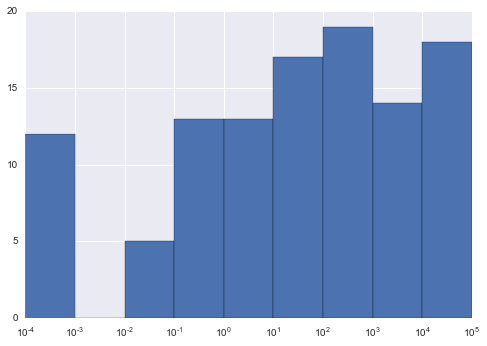

In [90]:
selected_cs = pd.Series([v.C_ for v in lrs.values() ])
fig, ax = plt.subplots()
selected_cs.hist(ax=ax, bins=Cs)
ax.set_xscale('log')
print

Looks like theyre quite variable, but centered around $C=100$, so we'll look at variable selection using the threshold at $C=100$

In [91]:
c_idx =list(Cs).index(100)
print c_idx

6


## Visualize the stability selections at $C=100$

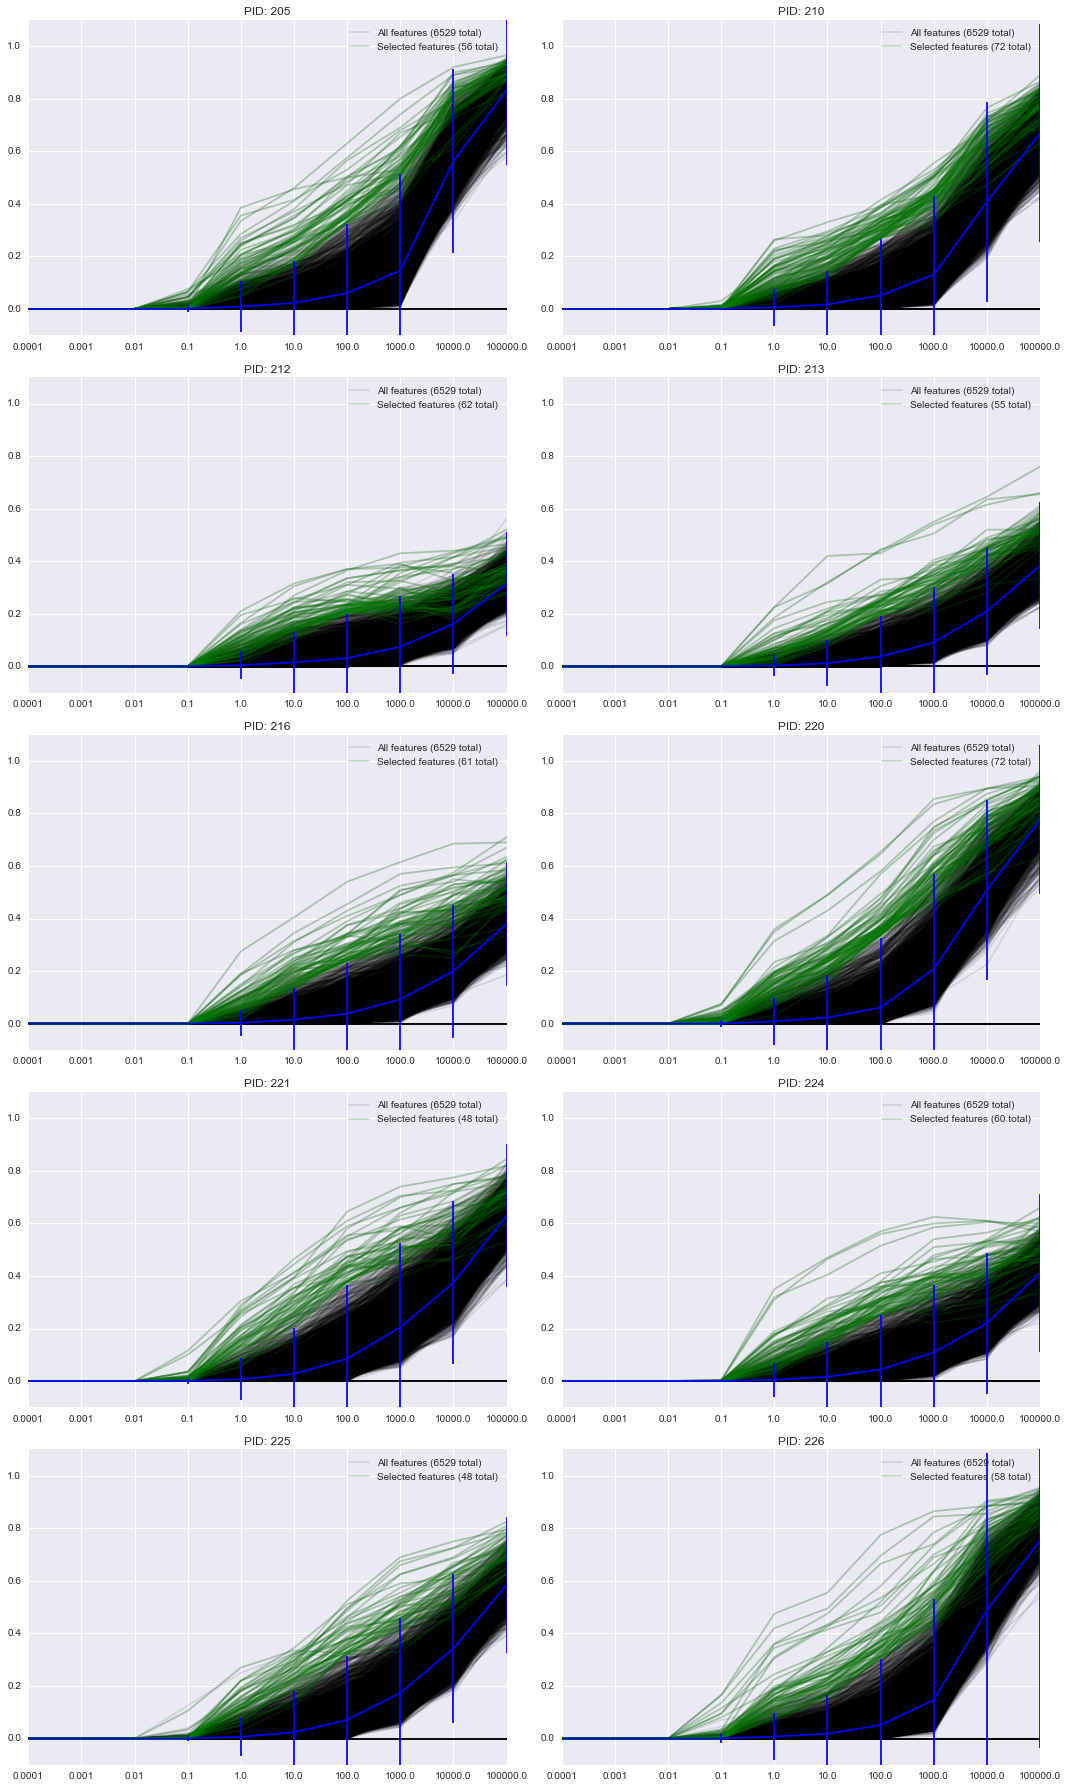

In [92]:
num = 10#len(rlrs)
nrows = num//2 if num % 2 == 0 else num//2+1
fig, axes = plt.subplots(nrows, 2, sharey=False, sharex=False, figsize=(15, nrows*5))
feature_indicators = {}
for i, (pid, rlr) in enumerate(rlrs.items()[:num]):
    ax = axes[i//2, i%2]
    scores = rlr.all_scores_
    avg = np.mean(scores.T, axis=1)
    std = np.std(scores.T, axis=1)

    # get the scores that are greater than 3 stddevs above average in at least one experiment
    num_std = 4
    thresh = avg + num_std*std
#     select_mask = np.any(scores[:, c_dx] > thresh[:,c_idx], axis=1) # all
    select_mask = scores[:, c_idx] > thresh[c_idx] # only at one c
    above = scores[select_mask]
    # print rlr.all_scores_.T.shape, above.shape

    ax.grid(zorder=0)
    s = ax.plot(scores.T, 'k', alpha=.1, zorder=1, label=('All features (%i total)'%scores.shape[0]))
    a = ax.plot(above.T, 'g', alpha=.2, zorder=2, label=('Selected features (%i total)'%above.shape[0]))
    ax.set_xticks(range(len(Cs)))
    ax.set_xticklabels(Cs)
    e = ax.errorbar(range(len(Cs)), avg, yerr=num_std*std, color='b', ecolor='b', zorder=3, label='Mean selection w/ 3 std')
#     ax.set_title("Stability Paths of all features")
#     ax.set_xlabel('$C$')
#     ax.set_ylabel('Selection Probability')
    ax.legend(handles=[s[0], a[0], e[0]])
    ax.set_title('PID: %i' % pid)
    ax.set_ylim(0.-.1,1.1)
#     ax.axvline(c_idx, ymin=-.1, ymax=1.1)
    
    # keep the selection vector
#     feature_indicators[pid] = select_mask.astype(np.int).reshape(-1,1)
fig.tight_layout()

In [57]:
scores =rlrs.values()[0].all_scores_
scores.shape, c_idx

((6529, 10), 6)

(6529,)


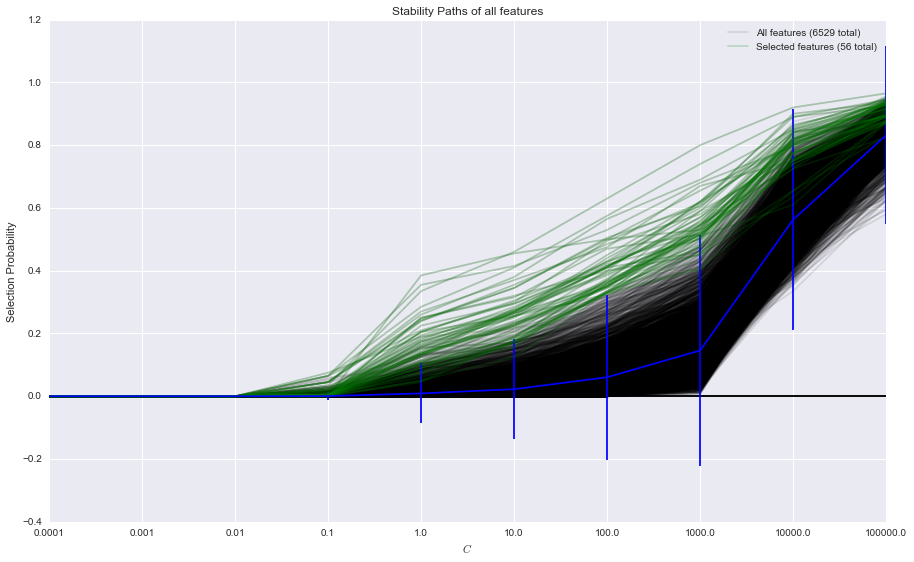

In [142]:
scores =rlrs.values()[0].all_scores_
avg = np.mean(scores.T, axis=1)
std = np.std(scores.T, axis=1)

# get the scores that are greater than 3 stddevs above average in at least one experiment
num_std = 4
thresh = avg + num_std*std
select_mask = scores[:, c_idx] > thresh[c_idx]
print select_mask.shape
above = scores[select_mask]
# print rlr.all_scores_.T.shape, above.shape

fig, ax = plt.subplots(1,1, figsize=(15,9))
ax.grid(zorder=0)
s = ax.plot(scores.T, 'k', alpha=.1, zorder=1, label=('All features (%i total)'%scores.shape[0]))
a = ax.plot(above.T, 'g', alpha=.2, label=('Selected features (%i total)'%above.shape[0]))
ax.set_xticks(range(len(Cs)))
ax.set_xticklabels(Cs)
e = ax.errorbar(range(len(Cs)), avg, yerr=num_std*std, color='b', ecolor='b', zorder=2, label='Mean selection w/ 3 std')
ax.set_title("Stability Paths of all features")
ax.set_xlabel('$C$')
ax.set_ylabel('Selection Probability')
ax.legend(handles=[s[0], a[0], e[0]])

In [233]:
thresh = avg + 3*std
s = rlr.all_scores_
s[np.any(s > thresh, axis=1)].shape

(196, 10)

In [243]:
vec = np.any(scores > thresh, axis=1).astype(np.int)

True


In [93]:
# from copy import deepcopy
# rlrs_copy = deepcopy(rlrs)

In [139]:
from copy import copy
rlrs = deepcopy(rlrs_copy)

In [140]:
def select_stable(num_std=3):
    feature_indicators = {}
    rlrs = deepcopy(rlrs_copy)
    num = len(rlrs)
    for i, (pid, rlr) in enumerate(rlrs.items()[:num]):
        scores = copy(rlr.all_scores_)
        avg = np.mean(scores.T, axis=1)
        std = np.std(scores.T, axis=1)

        # get the scores that are greater than 3 stddevs above average in at least one experiment
#         num_std = 
        thresh = avg + num_std*std
    #     select_mask = np.any(scores > thresh, axis=1) #all
        select_mask = scores[:, c_idx] > thresh[c_idx] # best C
        above = scores[select_mask]
        scores[~select_mask] = 0
        scores[select_mask] = 1 #above[c_idx] # 1
        feature_indicators[pid] = scores.reshape(-1,1)
    pids = feature_indicators.keys()
    var_ind = np.concatenate(feature_indicators.values(), axis=1).T
    return var_ind, pids

## Any variable selection clusterings?

In [97]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
# var_ind = select_stable(2)[:,:]
# U, D, V = np.linalg.svd(var_ind)

In [102]:
pids = feature_indicators.keys()

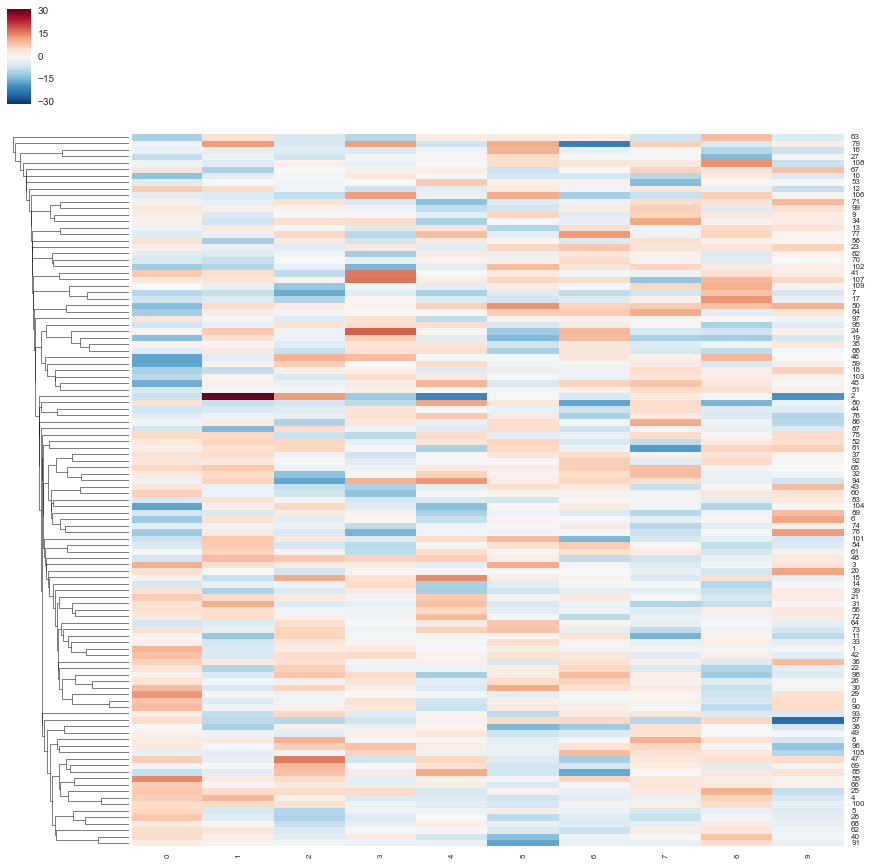

In [106]:
var_ind, pids = select_stable(2)

# fig, ax = plt.subplots(1,1, figsize=(15,12))
# ax.imshow(var_ind, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
# ax.set_yticks(range(len(pids)))
# ax.set_yticklabels(pids)
# plt.title("Selected Variables $> 2\sigma$ at $C=100$")
# avg_row_count = np.mean((var_ind != 0).sum(1))
# ax.set_xlabel('Average nonzero count per row %2.4f' % avg_row_count)
# print ''

pca = PCA(n_components=10)
medd = pca.fit_transform(var_ind)

# fig, ax = plt.subplots(1,1, figsize=(15,18))
# ax.set_title('1000 D PCA embeddings')
# im = ax.imshow(medd, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
# ax.set_yticks(range(len(pids)))
# ax.set_yticklabels(pids)
# plt.colorbar(im, fraction=0.046, pad=0.04)
# print ''

g = sb.clustermap(medd, method='single', metric='cosine', 
                  figsize=(15,15), row_cluster=True, col_cluster=False)
heatmap = g.ax_heatmap
labels = heatmap.get_yticklabels()
heatmap.set_yticklabels(labels, rotation=0, fontsize=8)
labels = heatmap.get_xticklabels()
heatmap.set_xticklabels(labels, rotation=90, fontsize=8)
print

pca = PCA(n_components=2)
lowd = pca.fit_transform(var_ind)

fig, ax = plt.subplots(figsize=(9,9))
ax.set_title('2D PCA embeddings')
scatter = ax.scatter(lowd[:,0], lowd[:,1])
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=pids)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# lowd = tsne.fit_transform(var_ind)

# fig, ax = plt.subplots(figsize=(9,9))
# ax.set_title('2D TSNE embeddings')

# scatter = ax.scatter(lowd[:,0], lowd[:,1])
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=pids)
# mpld3.plugins.connect(fig, tooltip)

# mpld3.display()



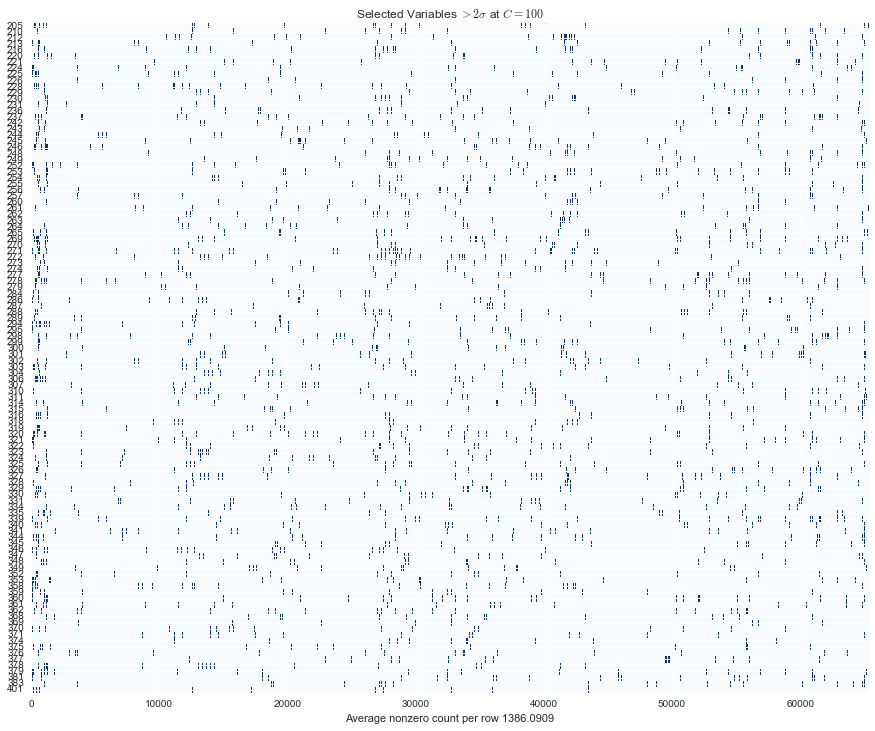

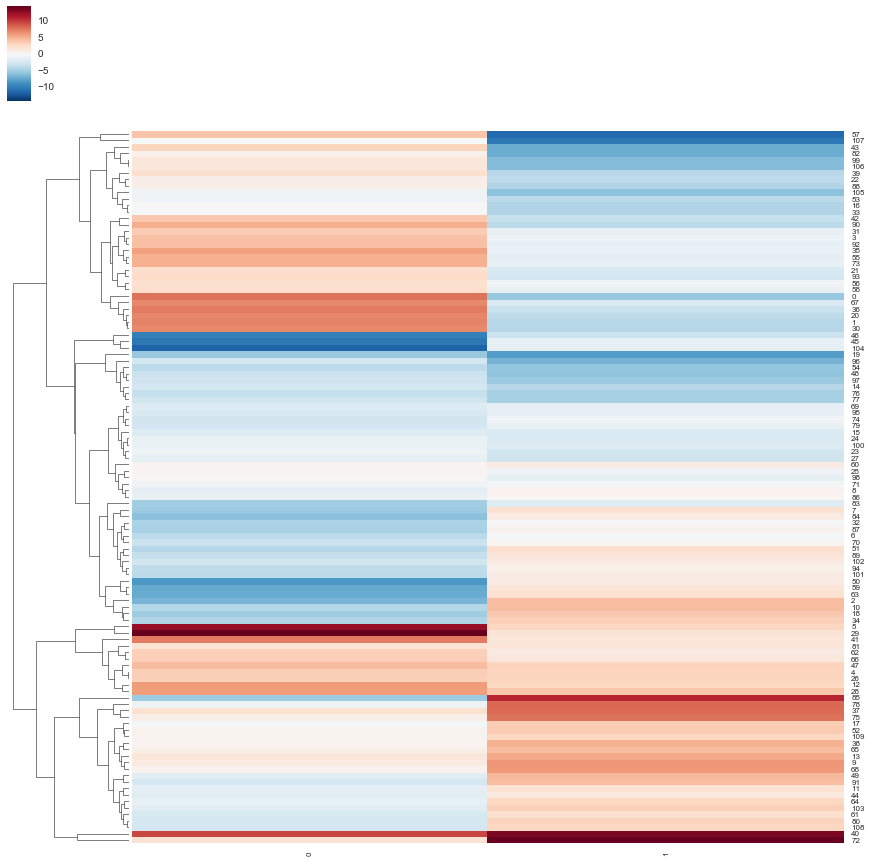

In [143]:
var_ind, pids = select_stable(3)

fig, ax = plt.subplots(1,1, figsize=(15,12))
ax.imshow(var_ind, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
ax.set_yticks(range(len(pids)))
ax.set_yticklabels(pids)
plt.title("Selected Variables $> 2\sigma$ at $C=100$")
avg_row_count = np.mean((var_ind != 0).sum(1))
ax.set_xlabel('Average nonzero count per row %2.4f' % avg_row_count)
print ''

pca = PCA(n_components=2)
medd = pca.fit_transform(var_ind)

# fig, ax = plt.subplots(1,1, figsize=(15,18))
# ax.set_title('1000 D PCA embeddings')
# im = ax.imshow(medd, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
# ax.set_yticks(range(len(pids)))
# ax.set_yticklabels(pids)
# plt.colorbar(im, fraction=0.046, pad=0.04)
# print ''

g = sb.clustermap(medd, method='weighted', metric='euclidean', 
                  figsize=(15,15), row_cluster=True, col_cluster=False)
heatmap = g.ax_heatmap
labels = heatmap.get_yticklabels()
heatmap.set_yticklabels(labels, rotation=0, fontsize=8)
labels = heatmap.get_xticklabels()
heatmap.set_xticklabels(labels, rotation=90, fontsize=8)
print

pca = PCA(n_components=2)
lowd = pca.fit_transform(var_ind)

fig, ax = plt.subplots(figsize=(9,9))
ax.set_title('2D PCA embeddings')
scatter = ax.scatter(lowd[:,0], lowd[:,1])
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=pids)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# lowd = tsne.fit_transform(var_ind)

# fig, ax = plt.subplots(figsize=(9,9))
# ax.set_title('2D TSNE embeddings')

# scatter = ax.scatter(lowd[:,0], lowd[:,1])
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=pids)
# mpld3.plugins.connect(fig, tooltip)

# mpld3.display()



In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

ERROR! Session/line number was not unique in database. History logging moved to new session 332


In [ ]:
def sparse_to_prox(sparse, metric='cosine'):
    n = sparse.shape[0]
    prox = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dist  = pdist(sparse[i])

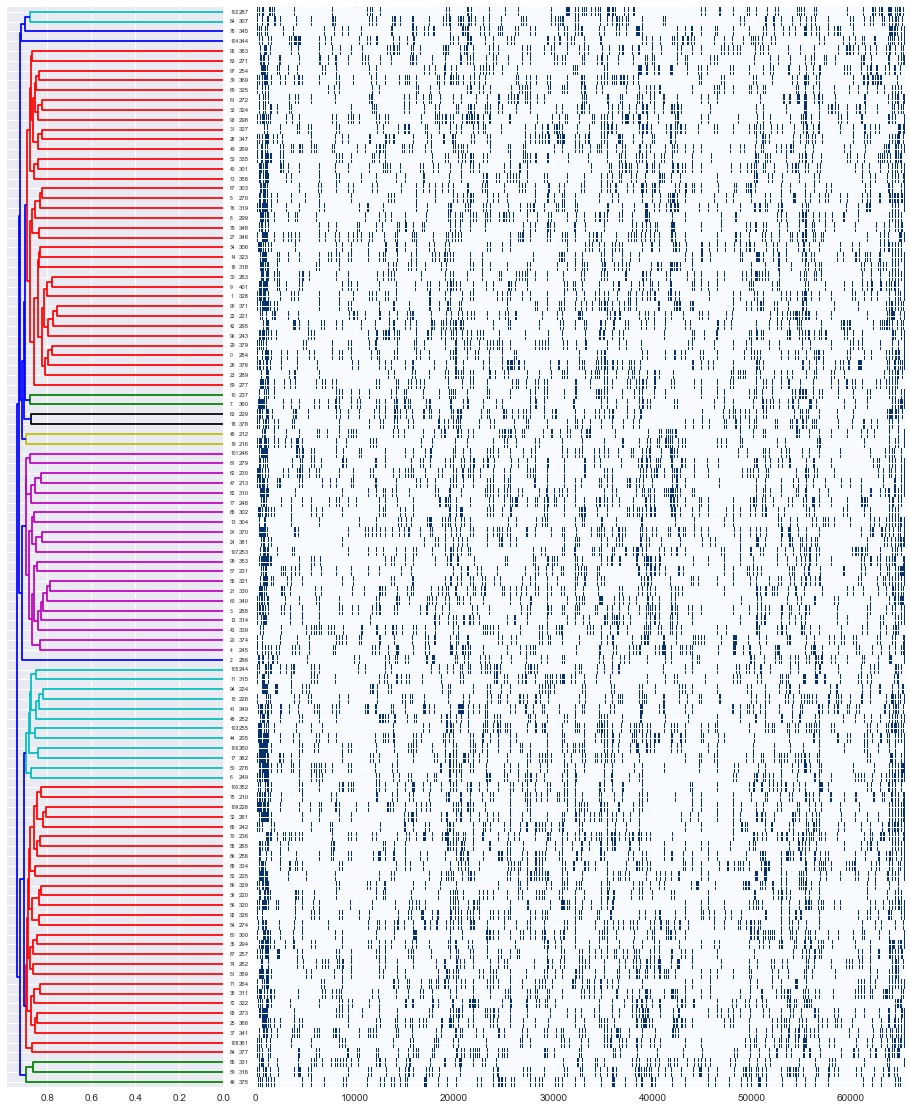

In [167]:
var_ind, pids = select_stable(a)
# dendrogram ax
fig = plt.figure(figsize=(15,15))
axd = fig.add_axes([0.09,0.1,0.2,1])
# var_ind, pids = select_stable(4)
links = linkage(var_ind, method='complete', metric='jaccard')
dend = dendrogram(links, color_threshold=.9, orientation='left')
# axd.set_xticks([])
# axd.set_yticks([])

# matrix ax
axm = fig.add_axes([0.32,0.1,0.6,1])
var_ind = var_ind[dend['leaves'],:]
axm.imshow(var_ind, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
axm.set_yticks(range(len(pids)))
pids = np.array(pids)[dend['leaves']]
axm.set_yticklabels(pids, fontsize=6)
# axm.set_yticks(pids)
print

In [ ]:
var_ind, pids = select_stable(3)

# do pca first

# dendrogram ax
fig = plt.figure(figsize=(15,15))
axd = fig.add_axes([0.09,0.1,0.2,1])
# var_ind, pids = select_stable(4)
links = linkage(var_ind, method='complete', metric='jaccard')
dend = dendrogram(links, color_threshold=.9, orientation='left')
# axd.set_xticks([])
# axd.set_yticks([])

# matrix ax
axm = fig.add_axes([0.32,0.1,0.6,1])
var_ind = var_ind[dend['leaves'],:]
axm.imshow(var_ind, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
axm.set_yticks(range(len(pids)))
pids = np.array(pids)[dend['leaves']]
axm.set_yticklabels(pids, fontsize=6)
# axm.set_yticks(pids)
print

IndexError: positional indexers are out-of-bounds

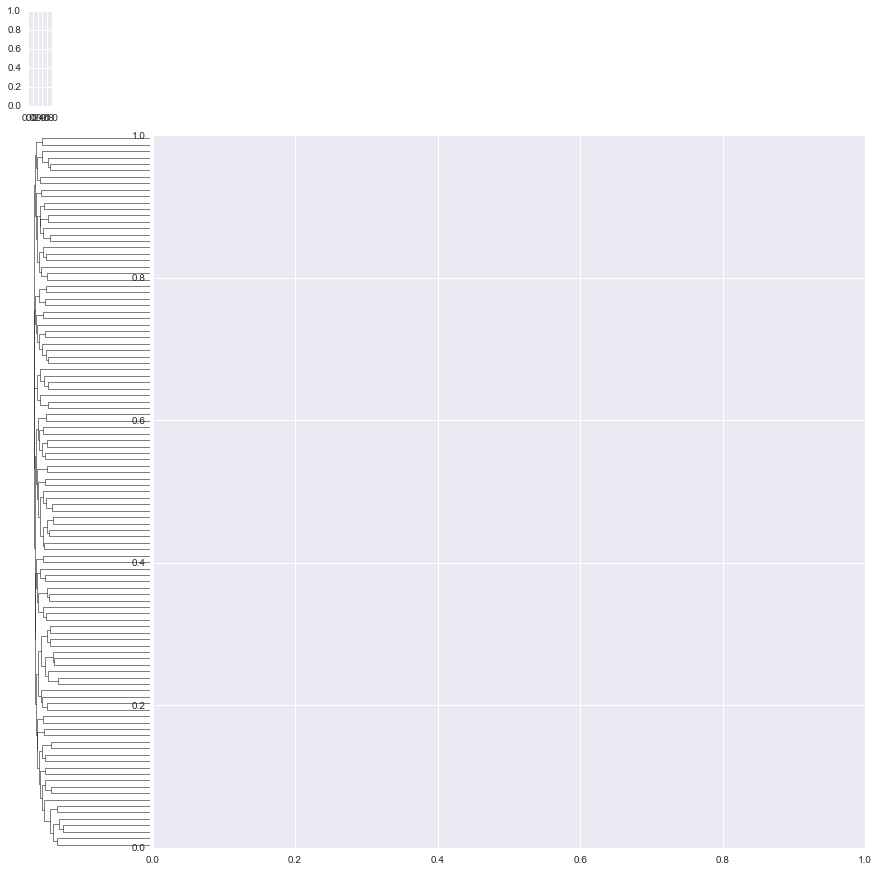

In [191]:
var_ind, pids = select_stable(3)

# fig, ax = plt.subplots(1,1, figsize=(15,12))
# ax.imshow(var_ind, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
# ax.set_yticks(range(len(pids)))
# ax.set_yticklabels(pids)
# plt.title("Selected Variables $> 2\sigma$ at $C=100$")
# avg_row_count = np.mean((var_ind != 0).sum(1))
# ax.set_xlabel('Average nonzero count per row %2.4f' % avg_row_count)
# print ''

pca = PCA(n_components=10)
medd = pca.fit_transform(var_ind)

# fig, ax = plt.subplots(1,1, figsize=(15,18))
# ax.set_title('1000 D PCA embeddings')
# im = ax.imshow(medd, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
# ax.set_yticks(range(len(pids)))
# ax.set_yticklabels(pids)
# plt.colorbar(im, fraction=0.046, pad=0.04)
# print ''

g = sb.clustermap(medd, method='complete', metric='cosine', 
                  row_cluster=True, col_cluster=False,
                  row_linkage=links, figsize=(15,15))
heatmap = g.ax_heatmap
labels = heatmap.get_yticklabels()
heatmap.set_yticklabels(labels, rotation=0, fontsize=8)
labels = heatmap.get_xticklabels()
heatmap.set_xticklabels(labels, rotation=90, fontsize=8)
print

# pca = PCA(n_components=2)
# lowd = pca.fit_transform(var_ind)

# fig, ax = plt.subplots(figsize=(9,9))
# ax.set_title('2D PCA embeddings')
# scatter = ax.scatter(lowd[:,0], lowd[:,1])
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=pids)
# mpld3.plugins.connect(fig, tooltip)

# mpld3.display()

# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# lowd = tsne.fit_transform(var_ind)

# fig, ax = plt.subplots(figsize=(9,9))
# ax.set_title('2D TSNE embeddings')

# scatter = ax.scatter(lowd[:,0], lowd[:,1])
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=pids)
# mpld3.plugins.connect(fig, tooltip)

# mpld3.display()



## Do a per person Ridge Regression

In [187]:
# from sklearn.linear_model import Log
lr2s = {}
for i, pid in enumerate(train_pids[:]):
    X = all_train[all_train.index.get_level_values('pid') == pid].drop(noncovariates, axis=1).as_matrix()
    y = all_train[all_train.index.get_level_values('pid') == pid]['label'].as_matrix()
    if len(np.unique(y)) < 2: 
        print "Bad PID: %i" % pid
        continue
    Cs = np.logspace(-4,5,10)
    lr2 = LRCV(Cs=Cs, cv=10, penalty='l2', refit=False)   
    print "%i :: PID: %i, n: %r" % (i, pid, X.shape[0])
#     lsp = lasso_stability_path(X, y,
#                                scaling=.5,
#                                random_state=random_seed,
#                                n_resampling=5,#200,
#                                n_grid=5,#100,
#                                sample_fraction=0.5,#0.75,
#                                eps =.1,
#                                n_jobs=-1,
#                                verbose=True)
    try:
        lr2.fit(X, y)
    except ValueError:
        print "Subsampling Value Error for Bad PID: %i" % pid
        continue
    lr2s[pid] = lr2
print "DONE"

0 :: PID: 205, n: 134
1 :: PID: 210, n: 86
2 :: PID: 213, n: 39
3 :: PID: 212, n: 31
4 :: PID: 225, n: 70
5 :: PID: 216, n: 34
6 :: PID: 221, n: 79
7 :: PID: 220, n: 117
8 :: PID: 236, n: 122
9 :: PID: 224, n: 42
10 :: PID: 229, n: 41
11 :: PID: 226, n: 113
12 :: PID: 228, n: 51
13 :: PID: 231, n: 59
14 :: PID: 230, n: 61
15 :: PID: 237, n: 101
16 :: PID: 243, n: 87
17 :: PID: 242, n: 39
18 :: PID: 245, n: 36
19 :: PID: 244, n: 40
20 :: PID: 248, n: 91
21 :: PID: 246, n: 80
22 :: PID: 249, n: 60
23 :: PID: 257, n: 113
24 :: PID: 253, n: 62
25 :: PID: 252, n: 107
26 :: PID: 255, n: 158
27 :: PID: 254, n: 84
28 :: PID: 279, n: 49
29 :: PID: 256, n: 114
30 :: PID: 261, n: 79
31 :: PID: 260, n: 93
32 :: PID: 263, n: 51
33 :: PID: 262, n: 45
34 :: PID: 264, n: 54
35 :: PID: 265, n: 96
36 :: PID: 269, n: 55
37 :: PID: 268, n: 47
38 :: PID: 271, n: 39
39 :: PID: 270, n: 39
40 :: PID: 273, n: 66
41 :: PID: 272, n: 36
42 :: PID: 274, n: 146
43 :: PID: 277, n: 144
44 :: PID: 278, n: 58
45 :: PID

In [188]:
pids = lr2s.keys()
beta_mat = np.concatenate([v.coef_.reshape(-1,1) for v in lr2s.values()], axis=1).T
print beta_mat.shape
print len(pids)

(111, 6529)
111


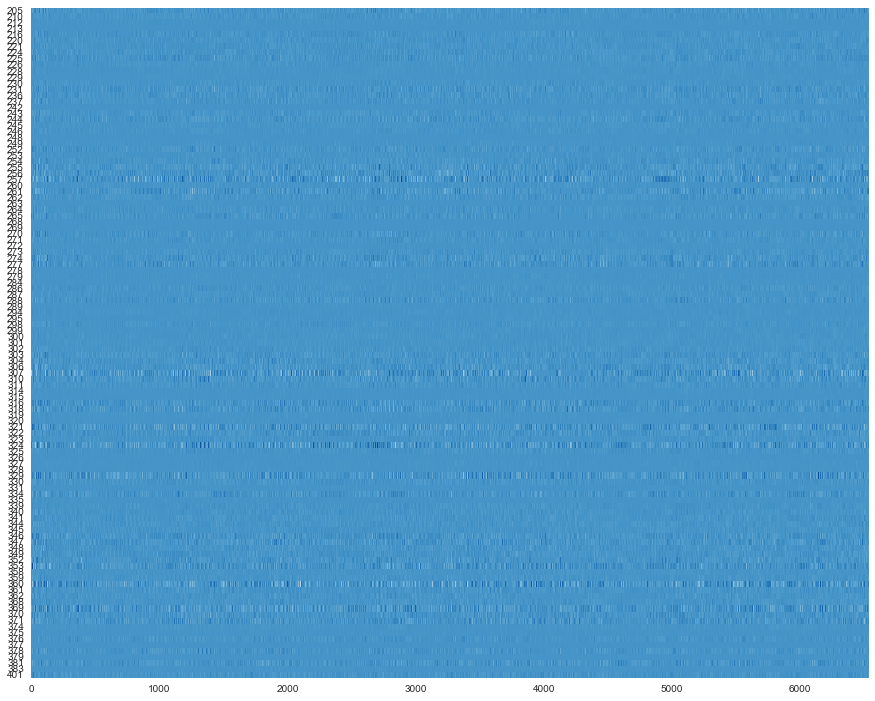

In [189]:
fig, ax = plt.subplots(1,1, figsize=(15,12))
ax.imshow(beta_mat, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
ax.set_yticks(range(len(pids)))
ax.set_yticklabels(pids)
ax.grid(False)
# plt.title("Selected Variables $> 2\sigma$ at $C=100$")
# avg_row_count = /np.mean((var_ind != 0).sum(1))
# ax.set_xlabel('Average nonzero count per row %2.4f' % avg_row_count)
print ''

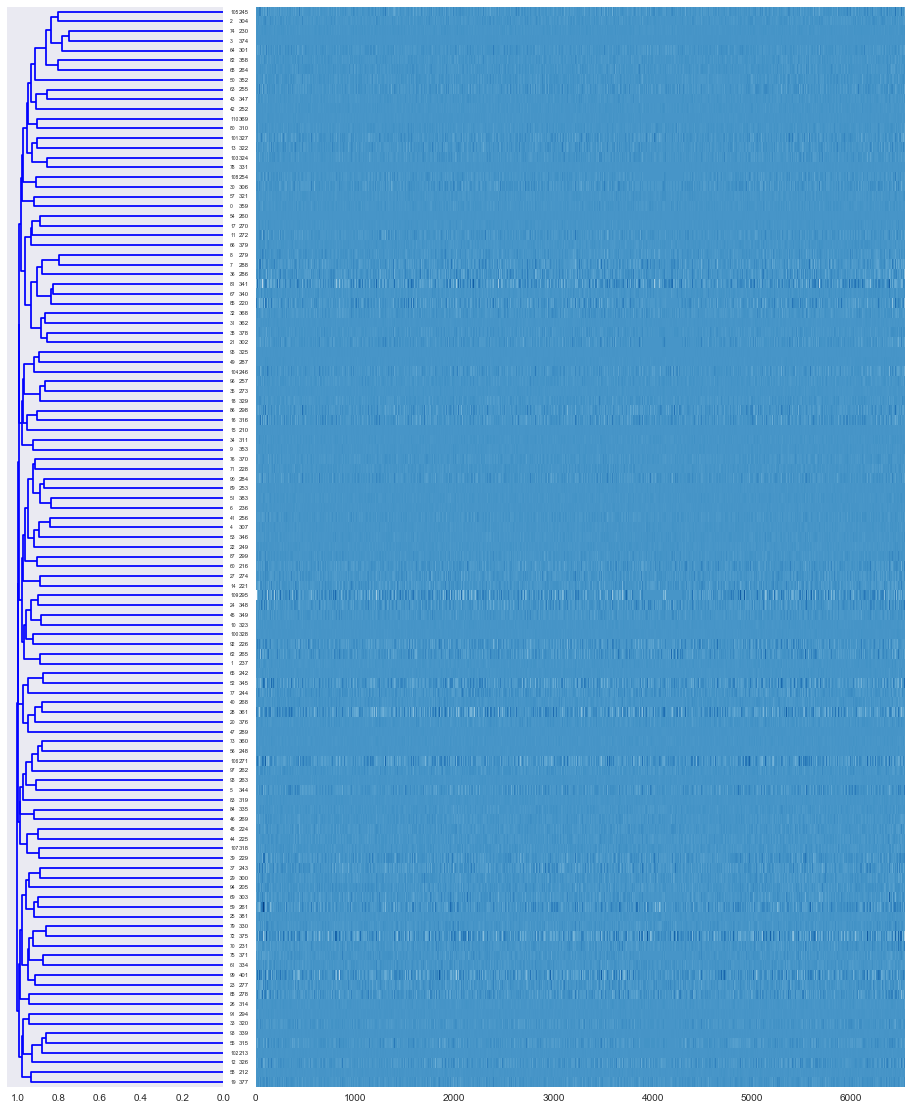

In [190]:
# dendrogram ax
fig = plt.figure(figsize=(15,15))
axd = fig.add_axes([0.09,0.1,0.2,1])
# var_ind, pids = select_stable(4)
links = linkage(beta_mat, method='average', metric='cosine')
dend = dendrogram(links, orientation='left')
axd.grid(False)
# axd.set_xticks([])
# axd.set_yticks([])

# matrix ax
axm = fig.add_axes([0.32,0.1,0.6,1])
var_ind = beta_mat[dend['leaves'],:]
axm.imshow(beta_mat, interpolation='nearest', aspect='auto', cmap=plt.cm.Blues)
axm.set_yticks(range(len(pids)))
pids = np.array(pids)[dend['leaves']]
axm.set_yticklabels(pids, fontsize=6)
axm.grid(False)
# axm.set_yticks(pids)
print

In [ ]:
### CUSTOM MPLD3 CLASS FOR VISUALIZING STABILITY PATHS ###
class HighlightLines(mpld3.plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.1, alpha_fg:1.0, 
                                                  bg_color:"#000000", fg_color:"#00FF00"};
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
             bg_color = this.props.bg_color;
             fg_color = this.props.fg_color;
         obj.elements()
             .on("mouseover", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg)
                              .style("stroke-color", fg_color); })
             .on("mouseout", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg)
                              .style("stroke-color", bg_color); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [mpld3.utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0,
                      "bg_color": lines[0].get_color(),
                      "fg_color":"#00FF00"}

In [48]:
all_train['Gender'].value_counts()

1.0    4444
0.0    2802
Name: Gender, dtype: int64

In [51]:
all_train['Language'].value_counts()

0.0    4779
1.0    2467
Name: Language, dtype: int64

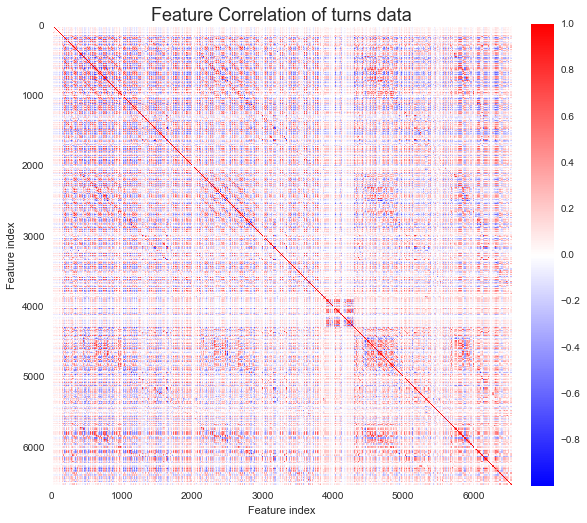

In [61]:
plt.figure(figsize=(9,9))
im = plt.imshow(np.corrcoef(train_x.T), interpolation='nearest', cmap=plt.cm.bwr)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Feature Correlation of turns data', fontsize=18)
plt.xlabel('Feature index')
plt.ylabel('Feature index')
plt.savefig('turns_feature_correlation.pdf')